## Telecom Churn - Group Case Study

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

###### Business Objective:
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

In [586]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

### Importing Libraries

In [587]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale

pd.options.display.float_format = '{:.2f}'.format

### Reading the data

In [588]:
churn_data=pd.read_csv("C:\\Users\\JOJO\\Desktop\\Upgrad_1\\PREDICTIVE ANALYTICS-2\\Telecom Churn - Group Case Study\\telecom_churn_data.csv")

churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,...,0,1.00,1.00,1.00,nan,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,...,0,nan,1.00,1.00,nan,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,...,0,nan,nan,nan,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,...,0,nan,nan,nan,nan,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,...,0,0.00,nan,nan,nan,1526,0.00,0.00,0.00,0.00


## Data Understanding and Cleaning

In [589]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [590]:
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00,99999.00,98981.00,98981.00,98981.00,99999.00,99999.00,99999.00,99999.00,96062.00,...,99999.00,25153.00,25571.00,26339.00,25922.00,99999.00,99999.00,99999.00,99999.00,99999.00
mean,7001207270.39,109.00,0.00,0.00,0.00,282.99,278.54,279.15,261.65,132.40,...,0.08,0.91,0.91,0.89,0.86,1219.85,68.17,66.84,60.02,3.30
std,695669.39,0.00,0.00,0.00,0.00,328.44,338.16,344.47,342.00,297.21,...,0.65,0.28,0.29,0.31,0.35,954.73,267.58,271.20,253.94,32.41
min,7000000074.00,109.00,0.00,0.00,0.00,-2258.71,-2014.05,-945.81,-1899.51,0.00,...,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00,0.00
25%,7000606232.50,109.00,0.00,0.00,0.00,93.41,86.98,84.13,62.69,7.38,...,0.00,1.00,1.00,1.00,1.00,467.00,0.00,0.00,0.00,0.00
50%,7001204632.00,109.00,0.00,0.00,0.00,197.70,191.64,192.08,176.85,34.31,...,0.00,1.00,1.00,1.00,1.00,863.00,0.00,0.00,0.00,0.00
75%,7001812030.50,109.00,0.00,0.00,0.00,371.06,365.34,369.37,353.47,118.74,...,0.00,1.00,1.00,1.00,1.00,1807.50,0.00,0.00,0.00,0.00
max,7002410905.00,109.00,0.00,0.00,0.00,27731.09,35145.83,33543.62,38805.62,7376.71,...,49.00,1.00,1.00,1.00,1.00,4337.00,12916.22,9165.60,11166.21,2618.57


In [591]:

#list of columns
pd.DataFrame(churn_data.columns)

,0
0,mobile_number
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
5,last_date_of_month_6
6,last_date_of_month_7
7,last_date_of_month_8
8,last_date_of_month_9
9,arpu_6


In [592]:
# Checking Missing Values & their percencentages
pd.options.display.float_format = '{:.2f}'.format
Missing_churn_data = pd.DataFrame((churn_data.isnull().sum()/len(churn_data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
Missing_churn_data

,feature,Missing%
189,arpu_3g_6,74.85
197,night_pck_user_6,74.85
161,total_rech_data_6,74.85
193,arpu_2g_6,74.85
165,max_rech_data_6,74.85
217,fb_user_6,74.85
177,av_rech_amt_data_6,74.85
157,date_of_last_rech_data_6,74.85
169,count_rech_2g_6,74.85
173,count_rech_3g_6,74.85


In [593]:
# Columns with more than 50% missing values
Missing_churn_data = round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)
Missing_churn_data[Missing_churn_data >= 50]

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_8   73.66
date_of_last_rech_data_9   74.08
total_rech_data_6          74.85
total_rech_data_7          74.43
total_rech_data_8          73.66
total_rech_data_9          74.08
max_rech_data_6            74.85
max_rech_data_7            74.43
max_rech_data_8            73.66
max_rech_data_9            74.08
count_rech_2g_6            74.85
count_rech_2g_7            74.43
count_rech_2g_8            73.66
count_rech_2g_9            74.08
count_rech_3g_6            74.85
count_rech_3g_7            74.43
count_rech_3g_8            73.66
count_rech_3g_9            74.08
av_rech_amt_data_6         74.85
av_rech_amt_data_7         74.43
av_rech_amt_data_8         73.66
av_rech_amt_data_9         74.08
arpu_3g_6                  74.85
arpu_3g_7                  74.43
arpu_3g_8                  73.66
arpu_3g_9                  74.08
arpu_2g_6                  74.85
arpu_2g_7                  74.43
arpu_2g_8 

As observed from above there are More Missing values for Recharge related, 2g, 3g, night_pck_users, fb_user

Let us create a function to analyze features across months 6,7 (good phase) and 8 which creates box plots to compare variable distribution, summary of the mean and standard deviation of variable distribution across months 6,7 and 8 for churn and non-churn customers.

#### Function for analyzing the features for 6th, 7th and 8th month

In [594]:
# creating function to anlyze the features across 6th, 7th and 8th month
def features_analyzing(feature_start):
    plt.rcParams["figure.figsize"] = [20, 8]
    fig = plt.figure()
    print("Churn Stats")
    cols = {c: feature_start + "_" + str(c) for c in [6,7,8]}
    frame_data = []
    [frame_data.append({
        "mean_of_6": churn_data[churn_data["churn"] == churn][cols[6]].mean(),
        "mean_of_7": churn_data[churn_data["churn"] == churn][cols[7]].mean(),
        "mean_of_8": churn_data[churn_data["churn"] == churn][cols[8]].mean(),
        "std_of_6": churn_data[churn_data["churn"] == churn][cols[6]].std(),
        "std_of_7": churn_data[churn_data["churn"] == churn][cols[7]].std(),
        "std_of_8": churn_data[churn_data["churn"] == churn][cols[8]].std()
    }) for churn in [0,1]]
    
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=churn_data, y=feature_start + "_6", x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[0])
    sns.boxplot(data=churn_data, y=feature_start + "_7",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[1])
    sns.boxplot(data=churn_data, y=feature_start + "_8",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[2])
    return pd.DataFrame(frame_data,index={"Not Churned","Churned"}).round(2)



### Data Analysis on Recharge Related Columns

In [595]:
# Extracting list of columns containing recharge related ones
recharge_columns =  churn_data.columns[churn_data.columns.str.contains('rech_amt|rech_data')]
print(recharge_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


In [596]:
# checking if there are any missing values for recharge amount
100*churn_data.loc[:,recharge_columns].isnull().sum()/len(churn_data)

total_rech_amt_6            0.00
total_rech_amt_7            0.00
total_rech_amt_8            0.00
total_rech_amt_9            0.00
max_rech_amt_6              0.00
max_rech_amt_7              0.00
max_rech_amt_8              0.00
max_rech_amt_9              0.00
date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_8   73.66
date_of_last_rech_data_9   74.08
total_rech_data_6          74.85
total_rech_data_7          74.43
total_rech_data_8          73.66
total_rech_data_9          74.08
max_rech_data_6            74.85
max_rech_data_7            74.43
max_rech_data_8            73.66
max_rech_data_9            74.08
av_rech_amt_data_6         74.85
av_rech_amt_data_7         74.43
av_rech_amt_data_8         73.66
av_rech_amt_data_9         74.08
dtype: float64

we can observe that approximately 73-75% of values for av_rech_amt_data,max_rech_data and total_rech_data and date_of_last_rech_data for mobile internet data are missing.

In [597]:
recharge_columns_all = churn_data.columns[churn_data.columns.str.contains('rech_amt|rech_data|rech_amt_data')]
churn_data.loc[:,recharge_columns_all].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,25153.00,25571.00,26339.00,25922.00,25153.00,25571.00,26339.00,25922.00,25153.00,25571.00,26339.00,25922.00
mean,327.51,322.96,324.16,303.35,104.64,104.75,107.73,101.94,2.46,2.67,2.65,2.44,126.39,126.73,125.72,124.94,192.60,200.98,197.53,192.73
std,398.02,408.11,416.54,404.59,120.61,124.52,126.90,125.38,2.79,3.03,3.07,2.52,108.48,109.77,109.44,111.36,192.65,196.79,191.30,188.40
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50,0.50,1.00
25%,109.00,100.00,90.00,52.00,30.00,30.00,30.00,28.00,1.00,1.00,1.00,1.00,25.00,25.00,25.00,25.00,82.00,92.00,87.00,69.00
50%,230.00,220.00,225.00,200.00,110.00,110.00,98.00,61.00,1.00,1.00,1.00,2.00,145.00,145.00,145.00,145.00,154.00,154.00,154.00,164.00
75%,437.50,428.00,434.50,415.00,120.00,128.00,144.00,144.00,3.00,3.00,3.00,3.00,177.00,177.00,179.00,179.00,252.00,252.00,252.00,252.00
max,35190.00,40335.00,45320.00,37235.00,4010.00,4010.00,4449.00,3399.00,61.00,54.00,60.00,84.00,1555.00,1555.00,1555.00,1555.00,7546.00,4365.00,4076.00,4061.00


As, you can see that total_rech_data has distinct values and non-NA values for total_rech_data and av_rech_amt_data is the same, thus we can find out the total recharge amount for data from both.

In [598]:
# Checking if there are any values where columns having total_rech_data is NA and value is present for av_rech_amt_data and vice versa

# checking how many av_rech_amt_data columns are having NA values
check_data_6 = churn_data['av_rech_amt_data_6'] == np.nan
check_data_7 = churn_data['av_rech_amt_data_7'] == np.nan
check_data_8 = churn_data['av_rech_amt_data_7'] == np.nan

# check if any value is present for these rows for total_rech_data
print(churn_data.loc[check_data_6,'total_rech_data_6'].sum())
print(churn_data.loc[check_data_7,'total_rech_data_7'].sum())
print(churn_data.loc[check_data_8,'total_rech_data_8'].sum())

# checking for how many total_rech_data columns are having NA Values
check_data_6 = churn_data['total_rech_data_6'] == np.nan 
check_data_7 = churn_data['total_rech_data_7'] == np.nan 
check_data_8 = churn_data['total_rech_data_8'] == np.nan 

# checking if any values are present for av_rech_amt_data columns
print(churn_data.loc[check_data_6,'av_rech_amt_data_6'].sum())
print(churn_data.loc[check_data_7,'av_rech_amt_data_7'].sum())
print(churn_data.loc[check_data_8,'av_rech_amt_data_8'].sum())

0.0
0.0
0.0
0.0
0.0
0.0


From above we see that the values are compatible with each other, so since the minimum value is 1 we can impute the NA values by 0, which means that the client did not recharge.

In [599]:
churn_data.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']]= churn_data.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']].replace(np.NaN,0)

In [600]:
churn_data.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']] = churn_data.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].replace(np.NaN,0)

In [601]:
# adding a derived variable total recharge amount for data: total_rech_amt_data
churn_data['total_rech_amt_data_6'] = churn_data.av_rech_amt_data_6*churn_data.total_rech_data_6
churn_data['total_rech_amt_data_7'] = churn_data.av_rech_amt_data_7*churn_data.total_rech_data_7
churn_data['total_rech_amt_data_8'] = churn_data.av_rech_amt_data_8*churn_data.total_rech_data_8

We can sum up total average recharge amount for good phase as the average of total recharge amount and total recharge amount for data for months 6 and 7

In [602]:
churn_data['total_avg_rech_amnt_good_phase'] = (churn_data.total_rech_amt_6 + churn_data.total_rech_amt_data_6 + churn_data.total_rech_amt_7+churn_data.total_rech_amt_data_7)/4

We describe High Value Customer as those with a total average recharge amount for good phase higher than the 70th percentile value.

### High value customers

In [603]:
# creating filter for values which are greater than 70th percentile of total average recharge amount for good phase 
high_value_cust = churn_data.total_avg_rech_amnt_good_phase >= churn_data.total_avg_rech_amnt_good_phase.quantile(0.7)

In [604]:
# Now let's subset the High Value customers
churn_data = churn_data.loc[high_value_cust,:]

In [605]:
# checking how many records are remaining
len(churn_data.loc[high_value_cust,:])

30001

#### Create labels for customers

In [606]:
# defining a new column in data frame as 'churn' with value as 1 if customer has churned and 0 if customer has not churned
#By Default Initializing value to 0
churn_data['churn']= 0

In [607]:
# The following columns are used in the 9th month to discover the churned customers
# total_ic_mou_9, vol_2g_mb_9 and vol_3g_mb_9

ch_9 = ['total_ic_mou_9', 'total_ic_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']
100*churn_data.loc[:,ch_9].isnull().sum()/len(churn_data)

total_ic_mou_9   0.00
total_ic_mou_9   0.00
vol_2g_mb_9      0.00
vol_3g_mb_9      0.00
dtype: float64

In [608]:
# define churned_cust boolean flag for customers where above values are zero
churned_cust = (churn_data.total_ic_mou_9 == 0) & (churn_data.total_ic_mou_9 == 0) & (churn_data.vol_2g_mb_9 ==0)& \
(churn_data.vol_3g_mb_9 ==0)

In [609]:
# set rows that fulfills churned_cust condition to 1
churn_data.loc[churned_cust,'churn']=1

In [610]:
# check  % of churned customers
100*churn_data.churn.sum()/len(churned_cust)

8.406386453784874

From above, 8.4% of high value customers have churned

In [611]:
# Now we will extract all the list of 9th Month (churned month) Columns
mth_9_columns =  churn_data.columns[churn_data.columns.str.contains('_9')]

In [612]:
# Now Let's drop all the columns corresponding to the attributes of churn phase
churn_data.drop(mth_9_columns,axis=1,inplace=True)

In [613]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 177 entries, mobile_number to churn
dtypes: float64(140), int64(28), object(9)
memory usage: 40.7+ MB


In [614]:
# Columns with more than 40% missing values
Missing_churn_data1 = round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)
Missing_churn_data1[Missing_churn_data1 >= 40]

date_of_last_rech_data_6   44.15
date_of_last_rech_data_7   43.15
date_of_last_rech_data_8   46.83
max_rech_data_6            44.15
max_rech_data_7            43.15
max_rech_data_8            46.83
count_rech_2g_6            44.15
count_rech_2g_7            43.15
count_rech_2g_8            46.83
count_rech_3g_6            44.15
count_rech_3g_7            43.15
count_rech_3g_8            46.83
arpu_3g_6                  44.15
arpu_3g_7                  43.15
arpu_3g_8                  46.83
arpu_2g_6                  44.15
arpu_2g_7                  43.15
arpu_2g_8                  46.83
night_pck_user_6           44.15
night_pck_user_7           43.15
night_pck_user_8           46.83
fb_user_6                  44.15
fb_user_7                  43.15
fb_user_8                  46.83
dtype: float64

#### Recharge amount related variables

In [615]:
#Extracting the recharge amount related columns
recharge_columns =  churn_data.columns[churn_data.columns.str.contains('rech_amt')]
recharge_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8'],
      dtype='object')

Churn Stats


,mean_of_6,mean_of_7,mean_of_8,std_of_6,std_of_7,std_of_8
Not Churned,649.56,663.82,614.54,548.02,574.33,615.19
Churned,782.50,624.30,255.57,675.28,663.40,450.55


<Figure size 1440x576 with 0 Axes>

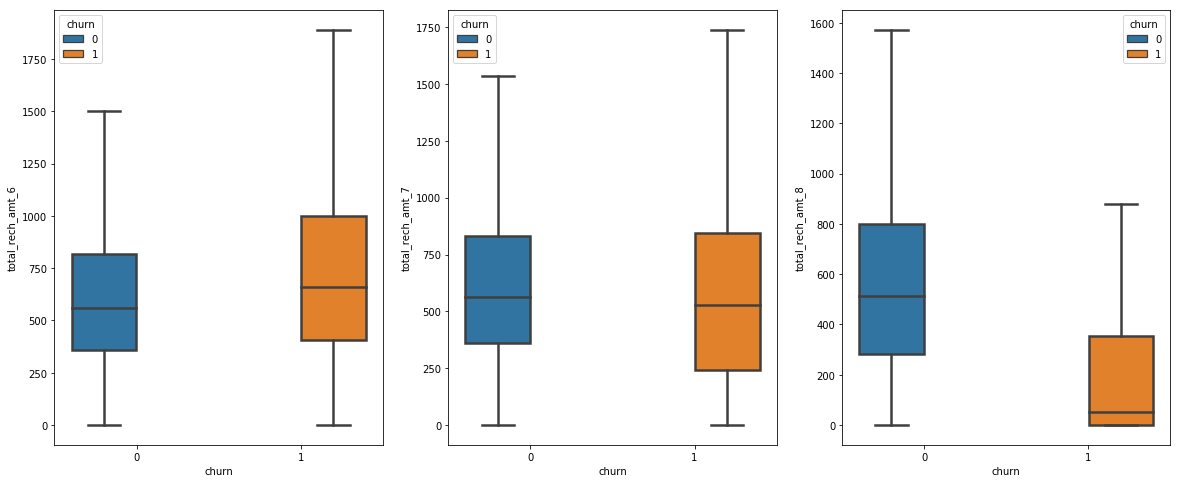

In [616]:
# Now let us analyze the total recharge amount:
features_analyzing('total_rech_amt')

We can see a drop in the total recharge amount for churned customers.

Churn Stats


,mean_of_6,mean_of_7,mean_of_8,std_of_6,std_of_7,std_of_8
Not Churned,460.70,545.73,498.19,1447.90,1500.10,1685.29
Churned,402.12,337.63,82.54,1047.33,1165.83,470.96


<Figure size 1440x576 with 0 Axes>

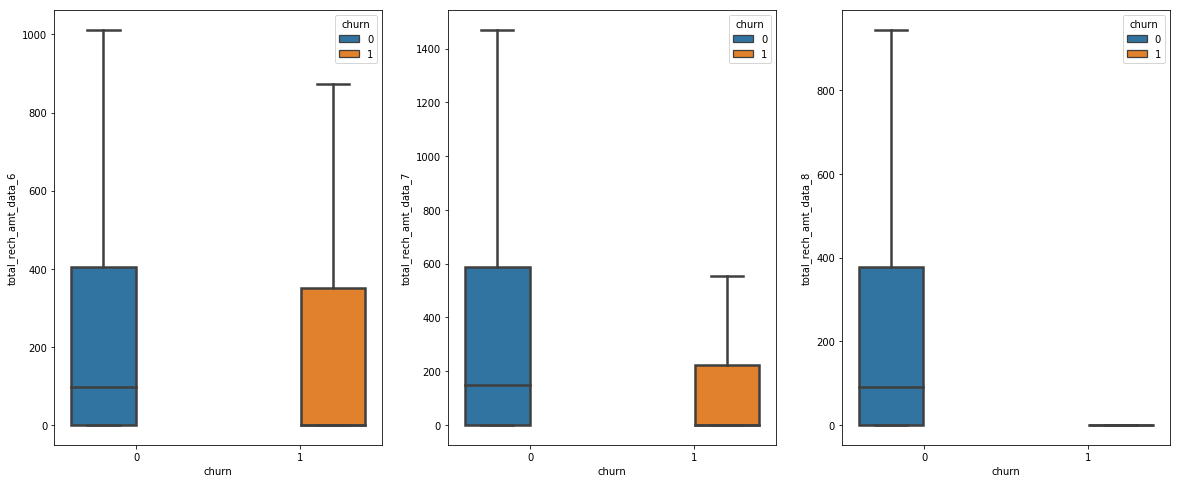

In [617]:
# analyzing total recharge amount for data:
features_analyzing('total_rech_amt_data')

We can see that there is a significant drop in total recharge amount for data in 8th month (action phase) for churned customers

Churn Stats


,mean_of_6,mean_of_7,mean_of_8,std_of_6,std_of_7,std_of_8
Not Churned,168.85,173.23,166.78,171.50,176.37,170.97
Churned,173.98,161.00,87.89,212.49,228.85,180.84


<Figure size 1440x576 with 0 Axes>

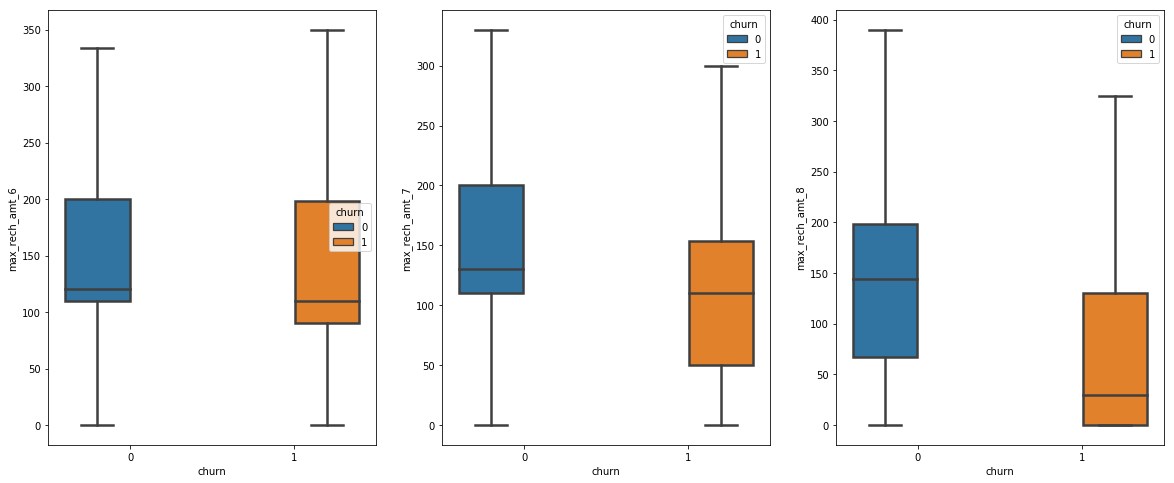

In [618]:
# analyze the maximum recharge amount for data:
features_analyzing('max_rech_amt')

We also see a decrease in the maximum recharge amount

Since we have already obtained total recharge amount for data using average recharge amount and total recharge for data, so let's drop these columns.

In [619]:
churn_data.drop(['av_rech_amt_data_6','av_rech_amt_data_7'
                   ,'av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8'],axis=1,inplace=True)

#### Deriving new variables

In [620]:
# total recharge amount for good phase: total_rech_amt_good_phase
# total recharge amount data for good phase: total_rech_amt_data_good_phase
# max recharge amount for good phase: max_rech_amt_good_phase

churn_data['total_rech_amt_good_phase'] = (churn_data.total_rech_amt_6 + churn_data.total_rech_amt_7)/2
churn_data['total_rech_amt_data_good_phase'] = (churn_data.total_rech_amt_data_6 + churn_data.total_rech_amt_data_7)/2
churn_data['max_rech_amt_good_phase'] = (churn_data.max_rech_amt_6 + churn_data.max_rech_amt_7)/2

# Let's drop original columns as these are not longer required
churn_data.drop(['total_rech_amt_6','total_rech_amt_7'
              ,'max_rech_amt_6','max_rech_amt_7','total_rech_amt_data_6','total_rech_amt_data_7'],axis=1,inplace=True)

# also drop total_avg_rech_amnt_good_ph as we are using the component columns defined above
churn_data.drop('total_avg_rech_amnt_good_phase',axis=1,inplace=True)

##### Last Day Recharge amount Variables

In [621]:
#Now let's extract the last day recharge amount columns
last_day_rech_amt = churn_data.columns[churn_data.columns.str.contains('day')]

Churn Stats


,mean_of_6,mean_of_7,mean_of_8,std_of_6,std_of_7,std_of_8
Not Churned,100.36,102.08,97.35,140.19,138.95,145.09
Churned,106.67,81.52,38.43,177.76,159.67,134.92


<Figure size 1440x576 with 0 Axes>

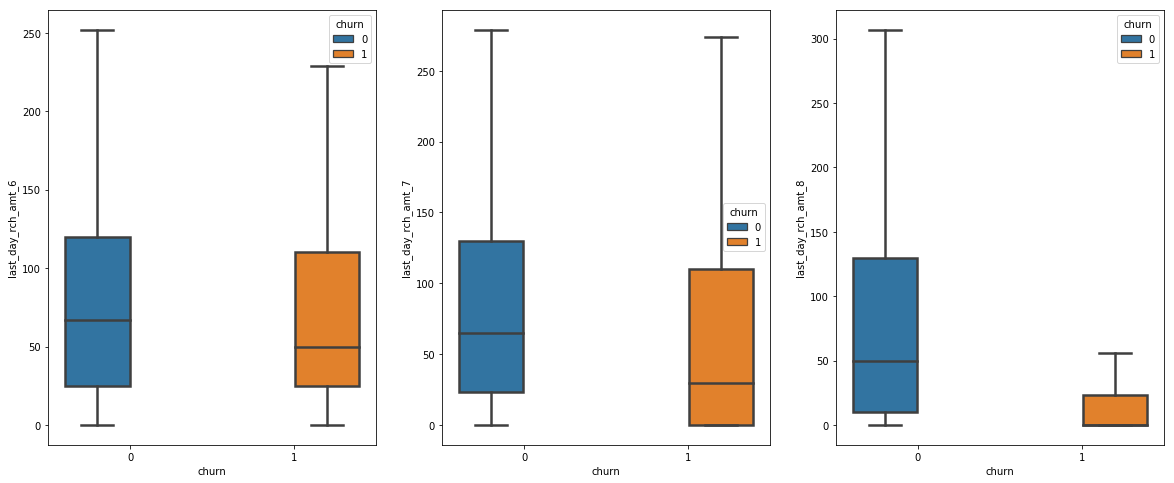

In [622]:
# let's check the mean variation in last day recharge for churned and non churned customers
features_analyzing('last_day_rch_amt')

There is drop in the Last Day Recharge amount for Churn users

In [623]:
# Defining new derived column
# last day recharge amount for good phase: last_day_rch_amt_good_ph
churn_data['last_day_rch_amt_good_phase'] = (churn_data.last_day_rch_amt_6 + churn_data.last_day_rch_amt_7)/2

# drop the original columns as these are not longer required
churn_data.drop(['last_day_rch_amt_6','last_day_rch_amt_7'],axis=1,inplace=True)

#### Other Related Variables

In [624]:
# checking other recharge related variables
ch_recharge = churn_data.columns[churn_data.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [625]:
# checking the % of NA values for recharge related variables
100*churn_data.loc[:,ch_recharge].isnull().sum()/len(churn_data)

total_rech_num_6    0.00
total_rech_num_7    0.00
total_rech_num_8    0.00
max_rech_data_6    44.15
max_rech_data_7    43.15
max_rech_data_8    46.83
dtype: float64

In [626]:
# Now let us check for the distribution for max_rech_data
churn_data.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16756.00,17057.00,15953.00
mean,139.80,140.43,136.33
std,118.85,120.25,119.53
min,1.00,1.00,1.00
25%,25.00,25.00,25.00
50%,152.00,152.00,152.00
75%,198.00,198.00,198.00
max,1555.00,1555.00,1555.00


We can see that the minimum value is 1 while the max is 1555 across the months, implying that the missing values are cases where there was no data recharge, so let's impute the missing values by 0 indicating no recharge.

In [627]:
churn_data.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = churn_data.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

##### Derive new variables

In [628]:
# Now Let us define new derived column as below
# maximum recharge for data for good phase: max_rech_data_good_ph
churn_data['max_rech_data_good_phase'] = (churn_data.max_rech_data_6 + churn_data.max_rech_data_7)/2

# we can drop the original columns as they are not longer required
churn_data.drop(['max_rech_data_6','max_rech_data_7'],axis=1,inplace=True)

In [629]:
# Now let us check the total recharge number
ch_total_recharge_num = churn_data.columns[churn_data.columns.str.contains('total_rech_num')]

# check the summary stats:
print(churn_data.loc[:,ch_total_recharge_num].describe())

# let's check the median variation in total recharge numbers for churned and non churned customers
pd.DataFrame([churn_data.loc[churn_data.churn==0,ch_total_recharge_num].median()
              ,churn_data.loc[churn_data.churn==1,ch_total_recharge_num].median()],index={'Not Churned','Churned'})

       total_rech_num_6  total_rech_num_7  total_rech_num_8
count          30001.00          30001.00          30001.00
mean              11.85             11.72              9.97
std                9.43              9.43              9.27
min                0.00              0.00              0.00
25%                6.00              6.00              4.00
50%                9.00              9.00              8.00
75%               15.00             15.00             13.00
max              307.00            138.00            196.00


,total_rech_num_6,total_rech_num_7,total_rech_num_8
Not Churned,9.00,9.00,8.00
Churned,11.00,9.00,3.00


We can observe that there are some outliers in 6th month overall distribution is similar for 6,7 and 8th month, we also can see a drop in median recharge numbers

##### Derive new variables

In [630]:
# define new derived column
# total recharge number for good phase: total_rech_num_good_ph
churn_data['total_rech_num_good_phase'] = (churn_data.total_rech_num_6 + churn_data.total_rech_num_7)/2

# We can drop the original columns as they are not required
churn_data.drop(['total_rech_num_6','total_rech_num_7'],axis=1,inplace=True)

In [631]:
# Columns with more than 40% missing values
Missing_churn_data2 = round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)
Missing_churn_data2[Missing_churn_data2 >= 40]

date_of_last_rech_data_6   44.15
date_of_last_rech_data_7   43.15
date_of_last_rech_data_8   46.83
count_rech_2g_6            44.15
count_rech_2g_7            43.15
count_rech_2g_8            46.83
count_rech_3g_6            44.15
count_rech_3g_7            43.15
count_rech_3g_8            46.83
arpu_3g_6                  44.15
arpu_3g_7                  43.15
arpu_3g_8                  46.83
arpu_2g_6                  44.15
arpu_2g_7                  43.15
arpu_2g_8                  46.83
night_pck_user_6           44.15
night_pck_user_7           43.15
night_pck_user_8           46.83
fb_user_6                  44.15
fb_user_7                  43.15
fb_user_8                  46.83
dtype: float64

### Analyze 2G and 3G related variables

In [632]:
# extracting 2G and 3G usage related columns
typ_2g_3g = churn_data.columns[churn_data.columns.str.contains('2g|3g',regex=True)]

In [633]:
churn_data.loc[:,typ_2g_3g].isnull().sum()/len(churn_data.loc[:,typ_2g_3g])

count_rech_2g_6   0.44
count_rech_2g_7   0.43
count_rech_2g_8   0.47
count_rech_3g_6   0.44
count_rech_3g_7   0.43
count_rech_3g_8   0.47
vol_2g_mb_6       0.00
vol_2g_mb_7       0.00
vol_2g_mb_8       0.00
vol_3g_mb_6       0.00
vol_3g_mb_7       0.00
vol_3g_mb_8       0.00
arpu_3g_6         0.44
arpu_3g_7         0.43
arpu_3g_8         0.47
arpu_2g_6         0.44
arpu_2g_7         0.43
arpu_2g_8         0.47
monthly_2g_6      0.00
monthly_2g_7      0.00
monthly_2g_8      0.00
sachet_2g_6       0.00
sachet_2g_7       0.00
sachet_2g_8       0.00
monthly_3g_6      0.00
monthly_3g_7      0.00
monthly_3g_8      0.00
sachet_3g_6       0.00
sachet_3g_7       0.00
sachet_3g_8       0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
dtype: float64

We see from above that for recharge count and average revenue for 2G/3 G per user, approximately 60 percent values are not accessible. Since we have available 2G/3 G volume-based data, let's drop those columns.

In [634]:
churn_data.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

In [635]:
# extract volume of 2G and 3G usage columns
volume_of_usage_2g_3g = churn_data.columns[churn_data.columns.str.contains('vol_2g|vol_3g',regex=True)]

# let's check the summary stats:
print(churn_data.loc[:,volume_of_usage_2g_3g ].describe())

       vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  \
count     30001.00     30001.00     30001.00     30001.00     30001.00   
mean        126.52       125.10       105.91       344.26       370.20   
std         330.53       331.55       313.38       913.75       915.53   
min           0.00         0.00         0.00         0.00         0.00   
25%           0.00         0.00         0.00         0.00         0.00   
50%           0.00         0.05         0.00         0.00         0.00   
75%          83.45        77.77        51.65       358.74       410.70   
max       10285.90      7873.55     11117.61     45735.40     28144.12   

       vol_3g_mb_8  
count     30001.00  
mean        351.49  
std         919.02  
min           0.00  
25%           0.00  
50%           0.00  
75%         356.19  
max       30036.06  


In [636]:
# check the mean variation in volume of 2G/3G usage for churned and non churned customers
pd.DataFrame([churn_data.loc[churn_data.churn==0,volume_of_usage_2g_3g].mean()
              ,churn_data.loc[churn_data.churn==1,volume_of_usage_2g_3g].mean()],index={'Not Churned','Churned'})

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
Not Churned,128.07,128.46,113.56,350.31,384.20,375.78
Churned,109.60,88.41,22.56,278.30,217.62,86.92


The use of 2 G and 3 G for churned customers decreases in the 8th month as well as the average use of 3 G for non-churned customers indicating that churned customers may be from areas where 3 G service is not accessible properly.

##### Derive varibales

In [637]:
# derived columns
# 2G volume usage for good phase: vol_2g_mb_good_phase
# 3G volume usage for good phase: vol_3g_mb_good_phase
churn_data['vol_2g_mb_good_phase'] = (churn_data.vol_2g_mb_6 + churn_data.vol_2g_mb_7)/2
churn_data['vol_3g_mb_good_phase'] = (churn_data.vol_3g_mb_6 + churn_data.vol_3g_mb_7)/2

# drop the original columns 
churn_data.drop(['vol_2g_mb_6','vol_2g_mb_7'
              ,'vol_3g_mb_6','vol_3g_mb_7'],axis=1,inplace=True)

In [638]:
# check monthly 2G and 3G service schemes
month_2g_3g = churn_data.columns[churn_data.columns.str.contains('monthly_2g|monthly_3g',regex=True)]


print(churn_data.loc[:,month_2g_3g].describe())

       monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_3g_6  monthly_3g_7  \
count      30001.00      30001.00      30001.00      30001.00      30001.00   
mean           0.17          0.18          0.15          0.22          0.23   
std            0.43          0.45          0.41          0.61          0.66   
min            0.00          0.00          0.00          0.00          0.00   
25%            0.00          0.00          0.00          0.00          0.00   
50%            0.00          0.00          0.00          0.00          0.00   
75%            0.00          0.00          0.00          0.00          0.00   
max            4.00          5.00          5.00         14.00         16.00   

       monthly_3g_8  
count      30001.00  
mean           0.21  
std            0.62  
min            0.00  
25%            0.00  
50%            0.00  
75%            0.00  
max           16.00  


In [639]:
# checking the mean variation in monthly schemes of 2G/3G usage for churned and non churned customers
pd.DataFrame([churn_data.loc[churn_data.churn==0,month_2g_3g].mean()
              ,churn_data.loc[churn_data.churn==1,month_2g_3g].mean()],index={'Not Churned','Churned'})

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Not Churned,0.18,0.19,0.17,0.22,0.24,0.23
Churned,0.09,0.07,0.02,0.19,0.14,0.06


In [640]:
# 2G monthly for good phase: monthly_2g_good_phase
# 3G monthly for good phase: monthly_3g_good_pase
churn_data['monthly_2g_good_phase'] = (churn_data.monthly_2g_6 + churn_data.monthly_2g_7)/2
churn_data['monthly_3g_good_phase'] = (churn_data.monthly_3g_6 + churn_data.monthly_3g_7)/2

# drop the original columns as these are not longer required
churn_data.drop(['monthly_2g_6','monthly_2g_7'
              ,'monthly_3g_6','monthly_3g_7'],axis=1,inplace=True)

#### Analyzing Volume based cost variable

In [641]:
churn_data.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column -not needed
churn_data.drop('vbc_3g_9',axis=1,inplace=True)

Churn Stats


,mean_of_6,mean_of_7,mean_of_8,std_of_6,std_of_7,std_of_8
Not Churned,162.62,186.49,180.93,421.60,452.97,433.33
Churned,113.95,95.86,40.64,356.49,311.75,210.34


<Figure size 1440x576 with 0 Axes>

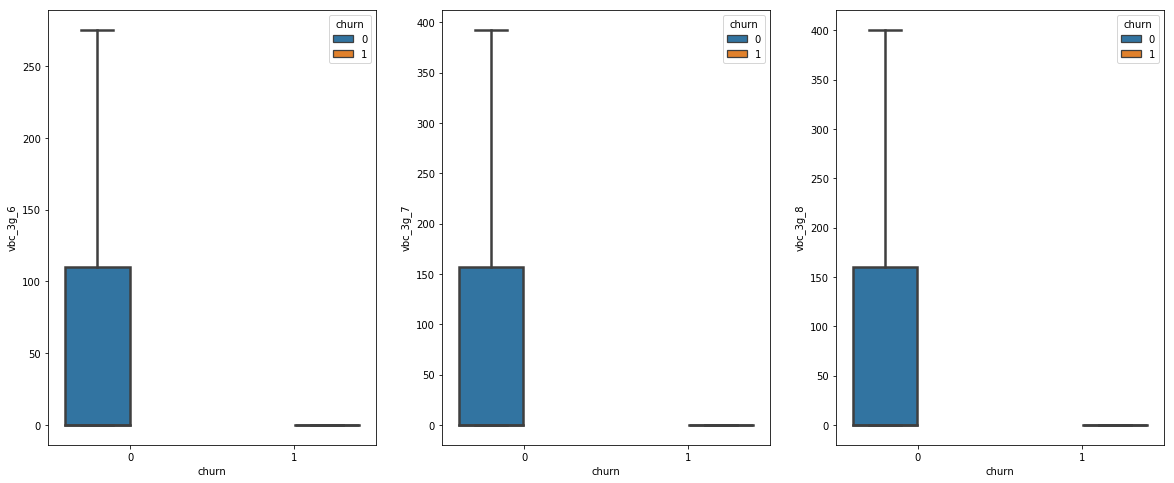

In [642]:
# check volumne based cost for 3G
volumn_based_cost_3g = churn_data.columns[churn_data.columns.str.contains('vbc_3g')]

# analyze volume based cost
features_analyzing('vbc_3g')

We can clearly see that volume-based costs for 3 G are much lower for Churned customers compared to Not-Churned customers and in the 8th month there is also a decrease in vbc.

In [643]:
#  derived columns
# 3g volume based cost for good phase: vbc_3g_good_phase
churn_data['vbc_3g_good_phase'] = (churn_data['vbc_3g_6'] + churn_data['vbc_3g_7'])/2

# drop the original columns 
churn_data.drop(['vbc_3g_6','vbc_3g_7'],axis=1,inplace=True)

### Analyzing Sachet subscription

In [644]:
# checking sachet subscription for 2G/3G
sachet_2g_3g = churn_data.columns[churn_data.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

print(churn_data.loc[:,sachet_2g_3g].describe())

pd.DataFrame([churn_data.loc[churn_data.churn==0,sachet_2g_3g].mean()
              ,churn_data.loc[churn_data.churn==1,sachet_2g_3g].mean()],index={'Not Churned','Churned'})

       sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_3g_6  sachet_3g_7  \
count     30001.00     30001.00     30001.00     30001.00     30001.00   
mean          1.07         1.21         1.05         0.21         0.23   
std           2.51         2.74         2.54         0.99         1.09   
min           0.00         0.00         0.00         0.00         0.00   
25%           0.00         0.00         0.00         0.00         0.00   
50%           0.00         0.00         0.00         0.00         0.00   
75%           1.00         1.00         1.00         0.00         0.00   
max          42.00        48.00        44.00        29.00        35.00   

       sachet_3g_8  
count     30001.00  
mean          0.20  
std           1.10  
min           0.00  
25%           0.00  
50%           0.00  
75%           0.00  
max          41.00  


,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Not Churned,1.07,1.24,1.13,0.21,0.23,0.22
Churned,1.03,0.88,0.27,0.24,0.22,0.06


In [645]:
churn_data['sachet_2g_good_phase'] = (churn_data.sachet_2g_6 + churn_data.sachet_2g_7)/2
churn_data['sachet_3g_good_phase'] = (churn_data.sachet_3g_6 + churn_data.sachet_3g_7)/2

# drop the original columns
churn_data.drop(['sachet_2g_6','sachet_2g_7'
              ,'sachet_3g_6','sachet_3g_7'],axis=1,inplace=True)

### Analysis on Age on network variable

In [646]:
# Let's check the age of churned and non-churned clients on network
print(churn_data.loc[churn_data.churn==1,'aon'].mean())
print(churn_data.loc[churn_data.churn==0,'aon'].mean())

859.3049167327517
1241.4973252301759


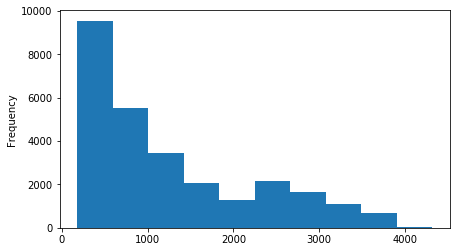

In [647]:
# age distribution for non churned customers
plt.figure(figsize=(7,4))
churn_data.loc[churn_data.churn==0,'aon'].plot.hist()

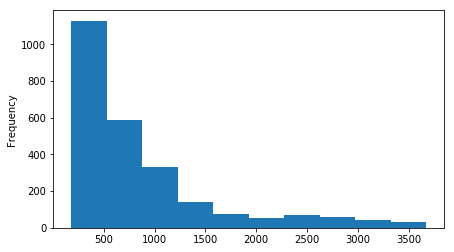

In [648]:
# Let's Visulaize Plot on age distribution for churned customers
plt.figure(figsize=(7,4))
churn_data.loc[churn_data.churn==1,'aon'].plot.hist()

From the above observation we can see the Churn Cases are happening before 1800 days

In [649]:
# Checking the Uniqueness for the circle id values
churn_data.circle_id.unique()

array([109], dtype=int64)

In [650]:
# There is only one circle id, so we can drop this column
churn_data.drop('circle_id',inplace=True,axis=1)

#### Churn vs Tenure

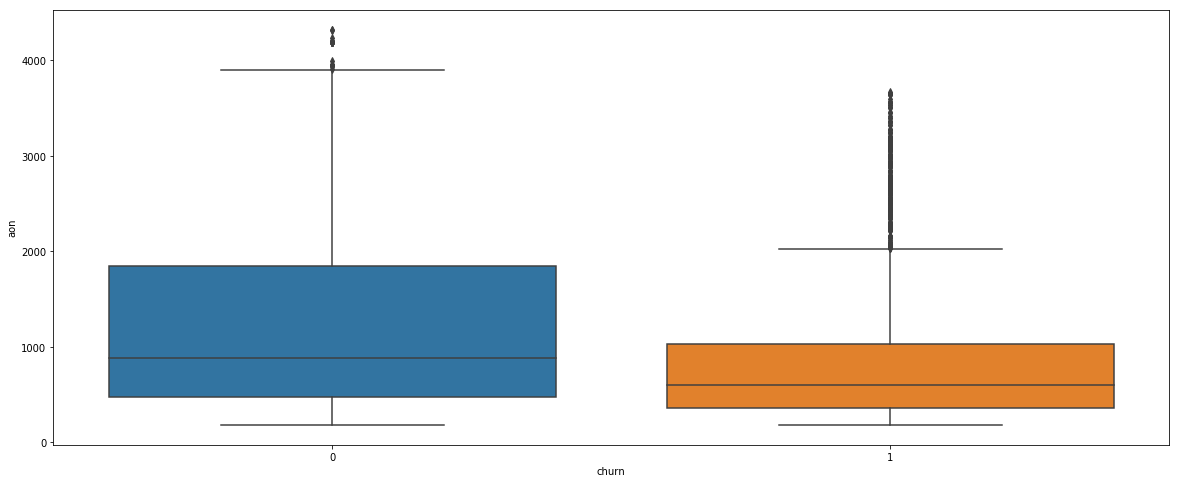

In [651]:
sns.boxplot(x = churn_data.churn, y = churn_data.aon)

We can see from the above plot, the customers who do not churn, they tend to stay for a longer tenure with the company.

### Analysis on Data Related Variables

In [652]:
# Extraction of Date columns
date_col = churn_data.columns[churn_data.columns.str.contains('date')]

# date to datetime Conversion
for date_col in list(date_col):
    churn_data[date_col]= pd.to_datetime(churn_data[date_col])

In [653]:
print(churn_data.last_date_of_month_6.dt.day.unique(),churn_data.last_date_of_month_7.dt.day.unique()
      ,churn_data.last_date_of_month_8.dt.day.unique())

[30] [31. nan] [31. nan]


In [654]:
#We can drop these columns as there is only 1 unique value prsenet
churn_data.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)

In [655]:
# Extraction of the column : day of last recharge
churn_data['day_of_last_rech_6'] =  churn_data.date_of_last_rech_6.dt.day
churn_data['day_of_last_rech_7'] =  churn_data.date_of_last_rech_7.dt.day
churn_data['day_of_last_rech_8'] =  churn_data.date_of_last_rech_8.dt.day

date_of_last_rech_columns = ['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8']

pd.DataFrame([churn_data.loc[churn_data.churn==0,date_of_last_rech_columns].median()
              ,churn_data.loc[churn_data.churn==1,date_of_last_rech_columns].median()],index={'Non Churned','Churned'})

,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
Non Churned,28.00,29.00,29.00
Churned,28.00,27.00,26.00


From the above Observation, Median Value has decreased gradually for Churned Customers

##### Derive new variables

In [656]:
# Deriving a new column for the shift in day of last recharge
churn_data['day_of_last_recharge_shift'] = churn_data.day_of_last_rech_8 - (churn_data.day_of_last_rech_6+churn_data.day_of_last_rech_7)/2

In [657]:
# Analyzing the pattern how the shift indicates for Churned and non churn customers
pd.DataFrame([churn_data.loc[churn_data.churn==0,['day_of_last_recharge_shift']].median()
              ,churn_data.loc[churn_data.churn==1,['day_of_last_recharge_shift']].median()],index={'Non Churned','Churned'})

,day_of_last_recharge_shift
Non Churned,0.50
Churned,-2.00


There is a Huge shift to Negative value for the churned customers

In [658]:
# We can drop the other colummns derived as they are not in longer use
churn_data.drop(['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8'],axis=1,inplace=True)

In [659]:
# Extraction of the day of last recharge
churn_data['day_of_last_rech_data_6'] =  churn_data.date_of_last_rech_data_6.dt.day
churn_data['day_of_last_rech_data_7'] =  churn_data.date_of_last_rech_data_7.dt.day
churn_data['day_of_last_rech_data_8'] =  churn_data.date_of_last_rech_data_8.dt.day

date_of_last_rech_columns = ['day_of_last_rech_data_6','day_of_last_rech_data_7','day_of_last_rech_data_8']

pd.DataFrame([churn_data.loc[churn_data.churn==0,date_of_last_rech_columns].median()
              ,churn_data.loc[churn_data.churn==1,date_of_last_rech_columns].median()],index={'Non Churned','Churned'})

,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8
Non Churned,22.00,24.00,23.00
Churned,23.00,20.00,15.00


There is gradual decrease to the day of last recharge data column for Churned customers

In [660]:
# Deriving a new column for the shift in day of last data recharge
churn_data['day_of_last_rech_data_shift'] = churn_data.day_of_last_rech_data_8 -(churn_data.day_of_last_rech_data_6+churn_data.day_of_last_rech_data_7)/2

In [661]:
# Analyzing how the shift chnages pattern for Churned and non churn customers
pd.DataFrame([churn_data.loc[churn_data.churn==0,['day_of_last_rech_data_shift']].median()
              ,churn_data.loc[churn_data.churn==1,['day_of_last_rech_data_shift']].median()],index={'Non Churned','Churned'})


,day_of_last_rech_data_shift
Non Churned,-0.50
Churned,-6.00


These is higher variation in the value of chured customers

In [662]:
# We can drop the other dervied colummns as they are no longer required
churn_data.drop(['day_of_last_rech_data_6','day_of_last_rech_data_7','day_of_last_rech_data_8'],axis=1,inplace=True)

In [663]:
# As We have derived day of month variables, Now We can drop the date columns 
churn_data.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)
churn_data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

### Analysis on Average revenue per user

Churn Stats


,mean_of_6,mean_of_7,mean_of_8,std_of_6,std_of_7,std_of_8
Not Churned,549.23,562.86,533.26,447.05,474.10,504.14
Churned,659.36,538.11,239.87,579.28,537.32,386.45


<Figure size 1440x576 with 0 Axes>

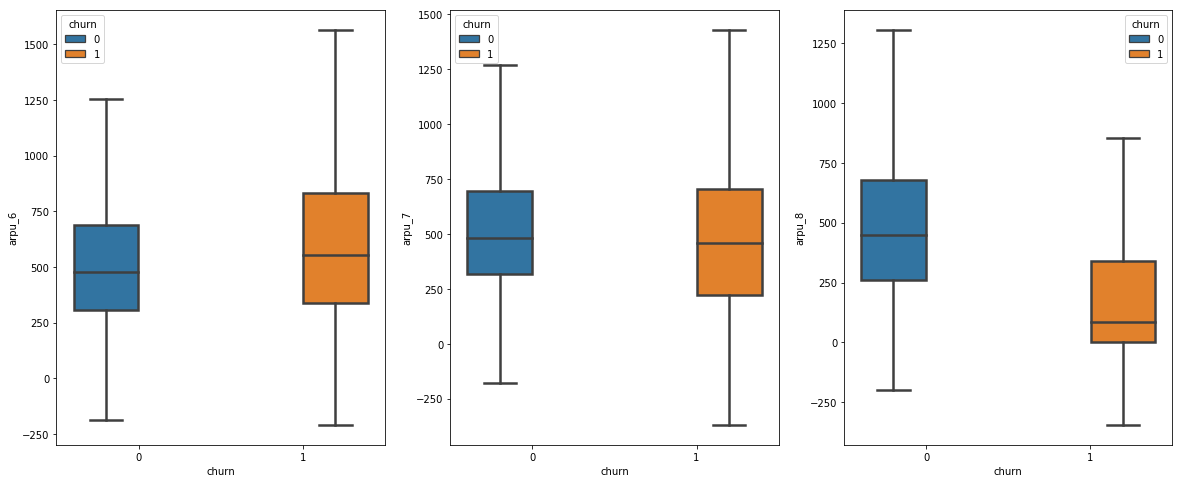

In [664]:
# Columns Extraction from data for average revenue per user
avg_rev_per_user_cols = churn_data.columns[churn_data.columns.str.contains('arpu_')]

# Analyzing Average revenue per user
features_analyzing('arpu')

There is a drop in action phase for Churned customers

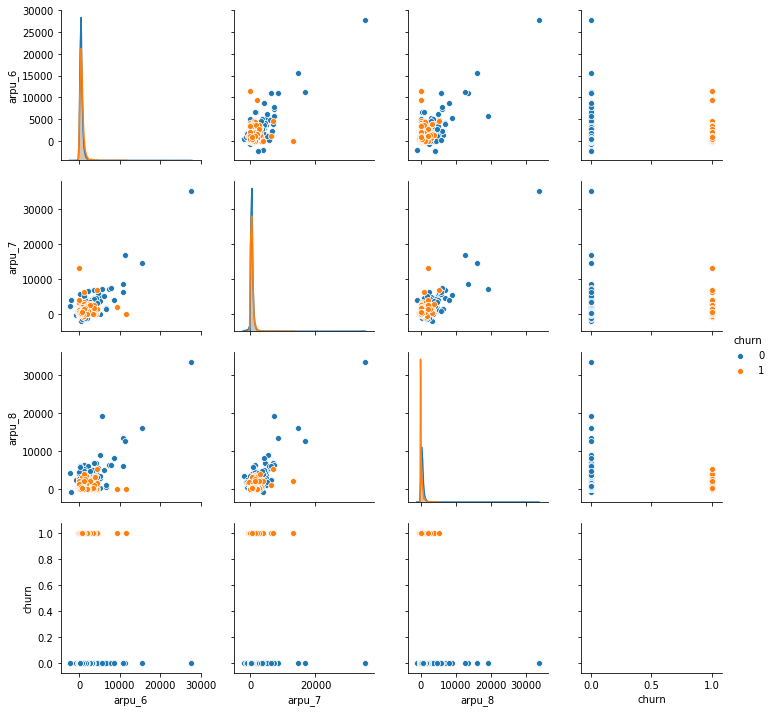

In [665]:
sns.pairplot(data=churn_data[['arpu_6','arpu_7','arpu_8','churn']],hue='churn')

##### Derive new variables

In [666]:
# Defining new derived columns
# arpu for good phase: arpu_good_phase
churn_data['arpu_good_phase'] = (churn_data.arpu_6 + churn_data.arpu_7)/2

# we can drop the original columns as they are not in use
churn_data.drop(['arpu_6','arpu_7'],axis=1,inplace=True)

#### Minutes of Usage related variables

In [667]:
# Deriving new columns for minutes of usage columns
min_usage_cols = churn_data.columns[churn_data.columns.str.contains('mou')]

In [668]:
min_usage_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

In [669]:
# Checking for any zero variation columns are there
zero_var_columns = churn_data.loc[:,min_usage_cols].std()[churn_data.loc[:,min_usage_cols].std()==0].index.values

zero_var_columns

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype=object)

In [670]:
# Dropping columns
churn_data.drop(list(zero_var_columns),axis=1,inplace=True)

In [671]:
# Checking the percentage of null values among mou variables in the columns
mou_columns = churn_data.columns[churn_data.columns.str.contains('mou')]
100*churn_data.loc[:,mou_columns].isnull().sum()/len(churn_data.loc[:,mou_columns])

onnet_mou_6        1.82
onnet_mou_7        1.79
onnet_mou_8        3.91
offnet_mou_6       1.82
offnet_mou_7       1.79
offnet_mou_8       3.91
roam_ic_mou_6      1.82
roam_ic_mou_7      1.79
roam_ic_mou_8      3.91
roam_og_mou_6      1.82
roam_og_mou_7      1.79
roam_og_mou_8      3.91
loc_og_t2t_mou_6   1.82
loc_og_t2t_mou_7   1.79
loc_og_t2t_mou_8   3.91
loc_og_t2m_mou_6   1.82
loc_og_t2m_mou_7   1.79
loc_og_t2m_mou_8   3.91
loc_og_t2f_mou_6   1.82
loc_og_t2f_mou_7   1.79
loc_og_t2f_mou_8   3.91
loc_og_t2c_mou_6   1.82
loc_og_t2c_mou_7   1.79
loc_og_t2c_mou_8   3.91
loc_og_mou_6       1.82
loc_og_mou_7       1.79
loc_og_mou_8       3.91
std_og_t2t_mou_6   1.82
std_og_t2t_mou_7   1.79
std_og_t2t_mou_8   3.91
                   ... 
loc_ic_t2m_mou_6   1.82
loc_ic_t2m_mou_7   1.79
loc_ic_t2m_mou_8   3.91
loc_ic_t2f_mou_6   1.82
loc_ic_t2f_mou_7   1.79
loc_ic_t2f_mou_8   3.91
loc_ic_mou_6       1.82
loc_ic_mou_7       1.79
loc_ic_mou_8       3.91
std_ic_t2t_mou_6   1.82
std_ic_t2t_mou_7

In [672]:
# Value for Maximum % of missing value
100*churn_data.loc[:,mou_columns].isnull().sum().max()/len(churn_data.loc[:,mou_columns])

3.913202893236892

We can Impute missing values with 0 as the Maximun Missing value for Minutes of usage columns is 3.19% which has not used at all

In [673]:
# Imputing null values with 0 for minutes of usage variables
churn_data.loc[:,mou_columns] = churn_data.loc[:,mou_columns].replace(np.NaN,0)

We can analyze the other groups for minutes of usage,

1. og : outgoing calls
2. ic : incoming calls
3. offnet: all kinds of calls outside operator network
4. Onnet: all kinds of call within same operator network

Now Let us start analyzing minutes for usage variables for month 6

In [674]:
# Grouping mou variables for month 6
month_ou_6 = churn_data.columns[churn_data.columns.str.contains('mou_6')]

In [675]:
month_ou_6

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'spl_og_mou_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')

In [676]:
#Analyzing Month of usage for outgoing 
month_ou_og_cols6 = churn_data.columns[churn_data.columns.str.contains('.*_og_.*mou_6',regex=True)]

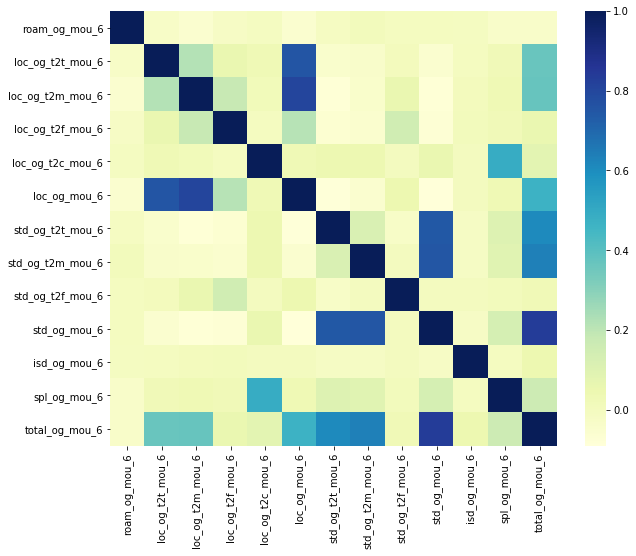

In [677]:
# Plotting a heatmap for finding correlation matrix among quantitative varibales
plt.figure(figsize=(10, 8))
sns.heatmap(churn_data.loc[:,month_ou_og_cols6].corr(), cmap="YlGnBu")
plt.show()

In [678]:
# We can drop columns total_og_mou_6, std_og_mou_6 and loc_og_mou_6 for all months as the component variables are present in dataset
ls_total_og_columns = churn_data.columns[churn_data.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
print(ls_total_og_columns)
churn_data.drop(ls_total_og_columns,axis=1,inplace=True)

Index(['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')


###### Derive new varibales

In [679]:
# Deriving new variables for good phase for og components
churn_data['spl_og_mou_good_phase'] = (churn_data.spl_og_mou_6 + churn_data.spl_og_mou_7)/2
churn_data['isd_og_mou_good_phase'] = (churn_data.isd_og_mou_6 + churn_data.isd_og_mou_7)/2
churn_data['roam_og_mou_good_phase'] = (churn_data.roam_og_mou_6 + churn_data.roam_og_mou_7)/2
churn_data['std_og_t2m_mou_good_phase'] = (churn_data.std_og_t2m_mou_6 + churn_data.std_og_t2m_mou_7)/2
churn_data['std_og_t2t_mou_good_phase'] = (churn_data.std_og_t2t_mou_6 + churn_data.std_og_t2t_mou_7)/2
churn_data['std_og_t2f_mou_good_phase'] = (churn_data.std_og_t2f_mou_6 + churn_data.std_og_t2f_mou_7)/2

churn_data['loc_og_t2m_mou_good_phase'] = (churn_data.loc_og_t2m_mou_6 + churn_data.loc_og_t2m_mou_7)/2
churn_data['loc_og_t2t_mou_good_phase'] = (churn_data.loc_og_t2t_mou_6 + churn_data.loc_og_t2t_mou_7)/2
churn_data['loc_og_t2f_mou_good_phase'] = (churn_data.loc_og_t2f_mou_6 + churn_data.loc_og_t2f_mou_7)/2
churn_data['loc_og_t2c_mou_good_phase'] = (churn_data.loc_og_t2c_mou_6 + churn_data.loc_og_t2c_mou_7)/2

In [680]:
# We can now drop all the original og mou variables
lst_og = churn_data.columns[churn_data.columns.str.contains('.*_og_.*mou_6|.*_og_.*mou_7',regex=True)]

print(lst_og)

churn_data.drop(lst_og,axis=1,inplace=True)

Index(['roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
       'spl_og_mou_7'],
      dtype='object')


### Analysis on Incoming mou variables

In [681]:
mou_incoming_cols6 = churn_data.columns[churn_data.columns.str.contains('.*_ic_.*mou_6',regex=True)]

mou_incoming_cols6

Index(['roam_ic_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')

we can define the below for the incoming Mou variables

total_incoming_mou_6 = loc_ic_mou_6 + std_ic_mou_6 + roam_ic_mou_6 + isd_ic_mou_6 + spl_ic_mou_6 + ic_others_6 loc_incoming_mou_6 = loc_ic_t2t_mou_6 + loc_ic_t2m_mou_6+loc_ic_t2f_mou_6+loc_ic_t2c_mou_6 std_incoming_mou_6 = std_ic_t2t_mou_6 + std_ic_t2m_mou_6 + std_ic_t2f_mou_6+std_ic_t2c_mou_6

In [682]:
#checking facts

print(churn_data.loc[7,'total_ic_mou_6'],churn_data.loc[7,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())

print(churn_data.loc[7,'loc_ic_mou_6'],churn_data.loc[7,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_t2c_mou_6']].sum())

print(churn_data.loc[7,'std_ic_mou_6'],churn_data.loc[7,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2c_mou_6']].sum())

626.46 626.92
427.88 427.86
180.54 180.51999999999998


In [683]:
# We can drop the columns total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 as they are already having component variables present in dataset
ls_total_incoming_cols = churn_data.columns[churn_data.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
print(ls_total_incoming_cols)
churn_data.drop(ls_total_incoming_cols,axis=1,inplace=True)

Index(['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8'],
      dtype='object')


In [684]:
# Deriving new variables for good phase to all ic components:
churn_data['spl_incoming_mou_good_phase'] = (churn_data.spl_ic_mou_6 + churn_data.spl_ic_mou_7)/2
churn_data['isd_incoming_mou_good_phase'] = (churn_data.isd_ic_mou_6 + churn_data.isd_ic_mou_7)/2
churn_data['roam_incoming_mou_good_phase'] = (churn_data.roam_ic_mou_6 + churn_data.roam_ic_mou_7)/2
churn_data['std_incoming_t2m_mou_good_phase'] = (churn_data.std_ic_t2m_mou_6 + churn_data.std_ic_t2m_mou_7)/2
churn_data['std_incoming_t2t_mou_good_phase'] = (churn_data.std_ic_t2t_mou_6 + churn_data.std_ic_t2t_mou_7)/2
churn_data['std_incoming_t2f_mou_good_phase'] = (churn_data.std_ic_t2f_mou_6 + churn_data.std_ic_t2f_mou_7)/2

churn_data['loc_incoming_t2m_mou_good_phase'] = (churn_data.loc_ic_t2m_mou_6 + churn_data.loc_ic_t2m_mou_7)/2
churn_data['loc_incoming_t2t_mou_good_phase'] = (churn_data.loc_ic_t2t_mou_6 + churn_data.loc_ic_t2t_mou_7)/2
churn_data['loc_incoming_t2f_mou_good_phase'] = (churn_data.loc_ic_t2f_mou_6 + churn_data.loc_ic_t2f_mou_7)/2

In [685]:
# We can now drop original og mou variables
ls_incoming = churn_data.columns[churn_data.columns.str.contains('.*_ic_.*mou_6|.*_ic_.*mou_7',regex=True)]
print(ls_incoming)
churn_data.drop(ls_incoming,axis=1,inplace=True)

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'isd_ic_mou_6', 'isd_ic_mou_7'],
      dtype='object')


### Analysis on Offnet Usage

In [686]:
offnet_columns = churn_data.columns[churn_data.columns.str.contains('offnet',regex=True)]

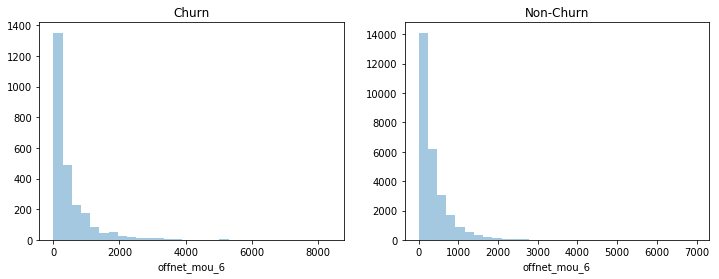

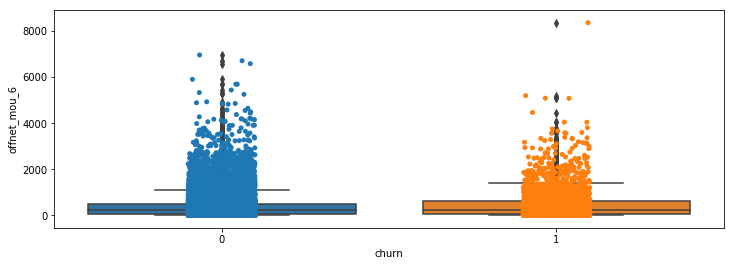

In [687]:

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(churn_data[churn_data['churn']==1].offnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(churn_data[churn_data['churn']==0].offnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='offnet_mou_6', data=churn_data)
sns.stripplot(x='churn', y='offnet_mou_6', data=churn_data, jitter=True, edgecolor="gray")


Churn Stats


,mean_of_6,mean_of_7,mean_of_8,std_of_6,std_of_7,std_of_8
Not Churned,364.92,377.79,352.68,463.15,489.51,490.20
Churned,469.29,381.51,143.30,650.11,591.94,325.64


<Figure size 1440x576 with 0 Axes>

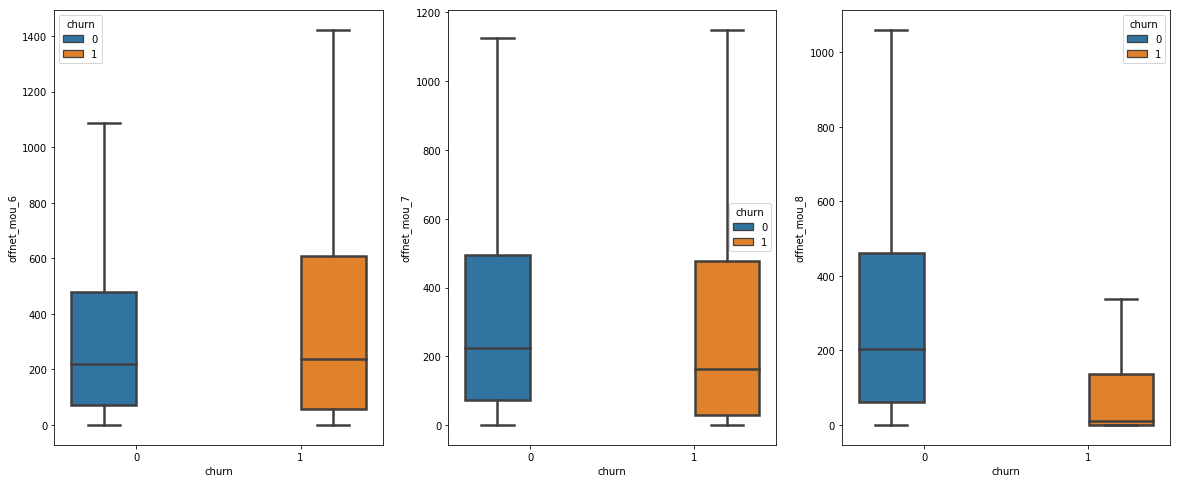

In [688]:
# Analyzing offnet mou values for churned and non churned customers
features_analyzing('offnet_mou')

There is a drop in action phase for churned customers

In [689]:
# Now Let's define a new derived column
# minutes of usage for good phase: offnet_mou_good_phase
churn_data['offnet_mou_good_phase'] = (churn_data.offnet_mou_6 + churn_data.offnet_mou_7)/2

# Now let's drop the original columns
churn_data.drop(['offnet_mou_6','offnet_mou_7'],axis=1,inplace=True)

In [690]:
# Checking summary for oc others and ic others mou
list_others = churn_data.columns[churn_data.columns.str.contains('_others')]

print(churn_data.loc[:,list_others].describe())

       og_others_6  og_others_7  og_others_8  ic_others_6  ic_others_7  \
count     29456.00     29464.00     28827.00     29456.00     29464.00   
mean          0.67         0.04         0.06         1.17         1.53   
std           4.14         2.70         3.38        14.11        16.14   
min           0.00         0.00         0.00         0.00         0.00   
25%           0.00         0.00         0.00         0.00         0.00   
50%           0.00         0.00         0.00         0.00         0.00   
75%           0.00         0.00         0.00         0.06         0.00   
max         609.81       370.13       394.93      1344.14      1495.94   

       ic_others_8  
count     28827.00  
mean          1.27  
std          13.04  
min           0.00  
25%           0.00  
50%           0.00  
75%           0.06  
max        1209.86  


In [691]:
# Deriving two new features
# OG others for good phase: og_others_good_phase
# IC otherd for good phase: ic_others_good_phase
churn_data['og_others_good_phase'] = (churn_data.og_others_6 + churn_data.og_others_7)/2
churn_data['ic_others_good_phase'] = (churn_data.ic_others_6 + churn_data.ic_others_6)/2


# Now we can drop the original columns
churn_data.drop(['og_others_6','og_others_7','ic_others_6','ic_others_7'],axis=1,inplace=True)

In [692]:
#Checking Missing values for more that 30%
is_more_than_30 = churn_data.isnull().sum()/len(churn_data) > 0.3
100*churn_data.loc[:,is_more_than_30].isnull().sum()/len(churn_data.loc[:,is_more_than_30])

night_pck_user_6              44.15
night_pck_user_7              43.15
night_pck_user_8              46.83
fb_user_6                     44.15
fb_user_7                     43.15
fb_user_8                     46.83
day_of_last_rech_data_shift   59.90
dtype: float64

In [693]:
# We can drop these columns as they are captured internet volume usage and total data amount recharged.
churn_data.drop(churn_data.columns[is_more_than_30],axis=1,inplace=True)

In [694]:
# Checking the number of variables
churn_data.shape

(30001, 79)

In [695]:
#Checking for Null values
is_na_values = churn_data.isnull().sum()/len(churn_data) > 0
100*churn_data.loc[:,is_na_values].isnull().sum()/len(churn_data.loc[:,is_na_values])

og_others_8                  3.91
ic_others_8                  3.91
day_of_last_recharge_shift   2.31
og_others_good_phase         2.61
ic_others_good_phase         1.82
dtype: float64

In [696]:
# We can replace all these values with 0
churn_data.loc[:,:] = churn_data.loc[:,:].replace(np.NaN,0)

In [697]:
# As compared all the Null values are replaced with 0
is_na_values = churn_data.isnull().sum()/len(churn_data) > 0
100*churn_data.loc[:,is_na_values].isnull().sum()/len(churn_data.loc[:,is_na_values])

Series([], dtype: float64)

In [698]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 79 columns):
mobile_number                      30001 non-null int64
arpu_8                             30001 non-null float64
onnet_mou_6                        30001 non-null float64
onnet_mou_7                        30001 non-null float64
onnet_mou_8                        30001 non-null float64
offnet_mou_8                       30001 non-null float64
roam_ic_mou_8                      30001 non-null float64
roam_og_mou_8                      30001 non-null float64
loc_og_t2t_mou_8                   30001 non-null float64
loc_og_t2m_mou_8                   30001 non-null float64
loc_og_t2f_mou_8                   30001 non-null float64
loc_og_t2c_mou_8                   30001 non-null float64
std_og_t2t_mou_8                   30001 non-null float64
std_og_t2m_mou_8                   30001 non-null float64
std_og_t2f_mou_8                   30001 non-null float64
isd_og_mou_8           

Now the Data is all set for Modeling

## Model building

We will be building various machine learning models  to correctly predict customers who may churn in the action stage (8th month)

In [699]:
#importing libraries

import sklearn.preprocessing
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [700]:
# Putting feature variable to X
X = churn_data.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = churn_data['churn']

##### Feature engineering

To obtain greater accuracy in our predictive model, we will do some additional feature engineering. We understand from EDA above that drop in the action phase parameter is highly indicative of a probable churn compared to a good phase.

Let's obtain action phase column that is simply the distinction between excellent stage feature value and action phase (8th month) feature value and discard the 8th month feature columns

In [701]:
# extracting good phase and 8th month feature list 
f_good_phase = X.loc[:,X.columns.str.contains('good_ph')]
phase_8 = X.loc[:,X.columns.str.contains('_8')]

In [702]:
# create a function to calculate difference between 8th month feature and good phase feature
def find_the_difference(x,y):      
    differ = 0.00
    if np.isnan(x) and np.isnan(y):
        differ = np.NAN
    elif np.isnan(y) and ~np.isnan(x):
        differ = x
    elif ~np.isnan(y)and np.isnan(x):
        differ = -y
    else:
        differ = x-y

    return(differ)

In [703]:
# creating a feature data frame copy 
X_diff = X.copy()

In [704]:
# extracting features without any good phase or 8th month indicator.
explore_features= set(map(lambda x: x.replace("_good_ph", ""), f_good_phase))
explore_features

{'arpuase',
 'ic_othersase',
 'isd_incoming_mouase',
 'isd_og_mouase',
 'last_day_rch_amtase',
 'loc_incoming_t2f_mouase',
 'loc_incoming_t2m_mouase',
 'loc_incoming_t2t_mouase',
 'loc_og_t2c_mouase',
 'loc_og_t2f_mouase',
 'loc_og_t2m_mouase',
 'loc_og_t2t_mouase',
 'max_rech_amtase',
 'max_rech_dataase',
 'monthly_2gase',
 'monthly_3gase',
 'offnet_mouase',
 'og_othersase',
 'roam_incoming_mouase',
 'roam_og_mouase',
 'sachet_2gase',
 'sachet_3gase',
 'spl_incoming_mouase',
 'spl_og_mouase',
 'std_incoming_t2f_mouase',
 'std_incoming_t2m_mouase',
 'std_incoming_t2t_mouase',
 'std_og_t2f_mouase',
 'std_og_t2m_mouase',
 'std_og_t2t_mouase',
 'total_rech_amt_dataase',
 'total_rech_amtase',
 'total_rech_numase',
 'vbc_3gase',
 'vol_2g_mbase',
 'vol_3g_mbase'}

#### Standardisation of features

In [705]:
# import standard scalar
from sklearn.preprocessing import StandardScaler

# extract columns
cols = X_diff.columns

# apply standard scalar
scaler = StandardScaler()

# produce scaled features
X_scaled = scaler.fit_transform(X_diff)

# convert to data frame
X_scaled = pd.DataFrame(X_diff, columns=cols)

In [706]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=100)

Create a function for printing evaluation metrics, since we have customer churn as positive class (1) we would attempt to maximize sensitivity, while attempting to maintain auc_score at a decent level.

In [707]:
from sklearn.metrics import confusion_matrix,roc_auc_score,f1_score

# define function to calculate and print model metrics.
def Metrics_out(y_test,y_pred):
    cp = confusion_matrix(y_test,y_pred)
    sensitivity = cp[1,1]/(cp[1,0]+cp[1,1])
    specificity =  cp[0,0]/(cp[0,1]+cp[0,0])
    precision = cp[1,1]/(cp[0,1]+cp[1,1])
    print('Confusion Matrix: \n',cp)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ",specificity)
    print("AUC Score: ", roc_auc_score(y_test,y_pred)) 
    print("Precision: ",precision)
    print("f1 Score: ",f1_score(y_test,y_pred))

#### Build logistic regression model

In [708]:
from sklearn.linear_model import LogisticRegression
lsr = LogisticRegression() 

In [709]:
lsr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [710]:
# predict results
y_pred = lsr.predict(X_test)

In [711]:
# print model evaluation metrics
Metrics_out(y_test,y_pred)

Confusion Matrix: 
 [[8121  110]
 [ 509  261]]
Sensitivity:  0.33896103896103896
Specificity:  0.9866358887134006
AUC Score:  0.6627984638372197
Precision:  0.7035040431266847
f1 Score:  0.4574934268185802


From above we see that the rating for sesitivity and auc score is fairly small, because the data is imbalanced for churn with only 8.4 %. To rectify this, we will do imbalanced class handling.

##### Handling of Imbalanced data

Imbalance data implies that there is a distinct amount of data points accessible for classes. Let's say if there are two classes, then for each class, balanced data would mean 50 % points. If the class imbalance is high, e.g. 85 % points -90 % points for one class and 10 % points -15 % for another class, standard optimization criteria or performance measures may not be as efficient and need to be modified.

Standard classification algorithms such as Decision Tree and Logistic Regression have a bias towards classes with numerous cases. They tend to predict only the data of the majority class. Minority class features are treated as noise and are often ignored. There is therefore a high probability of minority class misclassification relative to the majority class.

We will attempt to reduce the class imbalance by

###### SMOTE (Synthetic Minority Over-sampling Technique) resampling:
Works by creating synthetic samples from the minor class instead of creating copies. The algorithm selects two or more similar instances and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances.

In [712]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(kind = "regular")
print(" X_train dataset: ", X_train.shape)
print(" y_train dataset: ", y_train.shape)
print(" X_test dataset: ", X_test.shape)
print(" y_test dataset: ", y_test.shape)

 X_train dataset:  (21000, 77)
 y_train dataset:  (21000,)
 X_test dataset:  (9001, 77)
 y_test dataset:  (9001,)


In [713]:
# sampling the training data
X_smot, y_smot = smote.fit_sample(X_train, y_train)
print('After smote, shape of X_train: {}'.format(X_smot.shape))
print('After smote,  shape of Y_train: {} \n'.format(y_smot.shape))

print("After smote, counts of label '1': {}".format(sum(y_smot==1)))
print("After smote, counts of label '0': {}".format(sum(y_smot==0)))

After smote, shape of X_train: (38496, 77)
After smote,  shape of Y_train: (38496,) 

After smote, counts of label '1': 19248
After smote, counts of label '0': 19248


#### Undersampling by majority class

We are going to create a function for undersampling of majority class. This feature will sample the majority class randomly equivalent to the amount of samples from training data in the minority class.

In [714]:
# function to undersample majority class
def Major_class_(X_train,y_train):
    # creating training data frame
    train_df = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)],axis=1)
    
    # selecting the minority class i.e churn
    train_minority = train_df.loc[train_df.churn == 1,:]
    
    # creating majority class samples 
    majority_undersampled = pd.concat([train_minority,train_df.loc[train_df.churn == 0,:].sample(train_minority.shape[0])])

    return majority_undersampled

In [715]:
# creating undersampled data from training data
df_train_major = Major_class_(X_train,y_train)

# extract features and labels
X_major =df_train_major.drop('churn',axis=1)
y_major =df_train_major.churn

### Logistic Regression

In [716]:
from sklearn.linear_model import LogisticRegressionCV

In [717]:
lsr = LogisticRegression()
lsr.fit(X_smot,y_smot)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [718]:
y_pred = lsr.predict(X_test)
Metrics_out(y_test,y_pred)

Confusion Matrix: 
 [[6898 1333]
 [ 130  640]]
Sensitivity:  0.8311688311688312
Specificity:  0.8380512695905722
AUC Score:  0.8346100503797017
Precision:  0.32437911809427267
f1 Score:  0.4666423623769595


### PCA for Dimenesionality reduction

In [719]:
from sklearn.decomposition import PCA

In [720]:
pca = PCA(svd_solver='randomized', random_state=101)

In [721]:
pca.fit(X_major)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=101,
    svd_solver='randomized', tol=0.0, whiten=False)

In [722]:
# check the features with top PCA components
coloumn_name = list(X_scaled.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':coloumn_name})
pca_df.head()

,PC1,PC2,Feature
0,0.02,0.35,arpu_8
1,-0.11,0.20,onnet_mou_6
2,-0.10,0.25,onnet_mou_7
3,-0.06,0.21,onnet_mou_8
4,-0.06,0.29,offnet_mou_8


In [723]:
pca.explained_variance_ratio_[:50]

array([2.42193844e-01, 1.61302521e-01, 1.19543634e-01, 1.00441092e-01,
       7.23064915e-02, 6.32950580e-02, 4.58735727e-02, 3.45925482e-02,
       1.92564314e-02, 1.85480133e-02, 1.75696170e-02, 1.66185833e-02,
       1.27288429e-02, 1.17250432e-02, 8.62084874e-03, 7.22433451e-03,
       6.57821541e-03, 4.75333140e-03, 4.23238825e-03, 3.82669232e-03,
       3.66074622e-03, 3.49881893e-03, 3.41256599e-03, 2.29158944e-03,
       2.12164501e-03, 1.71556397e-03, 1.54337879e-03, 1.23775149e-03,
       1.19423919e-03, 9.66478841e-04, 9.02803449e-04, 7.68364183e-04,
       7.17987323e-04, 6.83071582e-04, 6.48308622e-04, 6.19348507e-04,
       4.21438235e-04, 4.00697815e-04, 3.42087385e-04, 3.30304337e-04,
       3.07318436e-04, 2.69691226e-04, 1.09097719e-04, 1.06465526e-04,
       8.94715265e-05, 8.46013449e-05, 7.37346325e-05, 5.96971106e-05,
       3.75650102e-05, 3.04399710e-05])

####  Scree plot

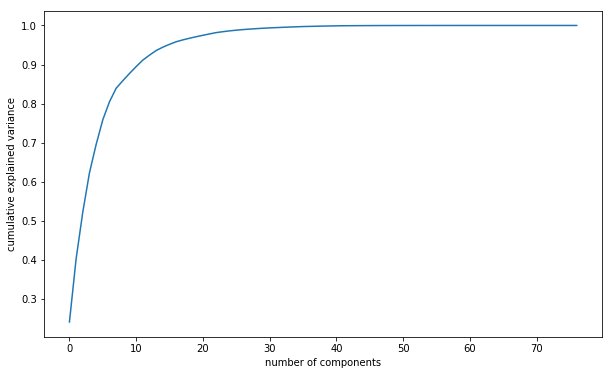

In [724]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We see from above that approximately 60 features capture 90% variance, let's decrease our feature set to 60

In [725]:
#incremental PCA  
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [726]:
X_train_pca = pca_final.fit_transform(X_major)
X_train_pca.shape

(3504, 40)

In [727]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 40)

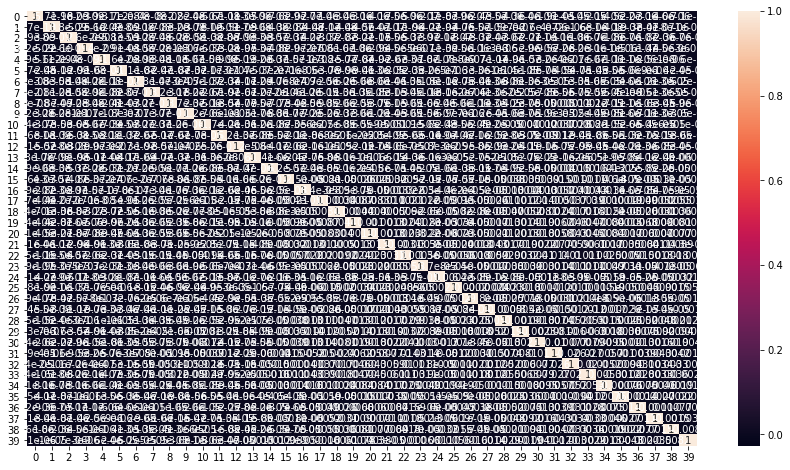

In [728]:
# correlation matrix 
corrmat = np.corrcoef(X_train_pca.transpose())

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (15,8))
sns.heatmap(corrmat,annot = True)

In [729]:
lr_pca = LogisticRegression()
model_pca = lr_pca.fit(X_train_pca,y_major)

In [730]:
y_pred = lr_pca.predict(X_test_pca)

In [731]:
Metrics_out(y_test,y_pred) 

Confusion Matrix: 
 [[6608 1623]
 [ 130  640]]
Sensitivity:  0.8311688311688312
Specificity:  0.8028186125622646
AUC Score:  0.8169937218655479
Precision:  0.2828104286345559
f1 Score:  0.4220243982855259


Selecting the optimum probability threshold for model

In [732]:
# checking the predicted probabilities
y_predicted_prob = lr_pca.predict_proba(X_test_pca)

In [733]:
# create predicted probability data frame
y_predicted_prob_df = pd.DataFrame(y_predicted_prob)
y_predicted_prob_df = y_predicted_prob_df.iloc[:,[1]]

y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index

y_predicted_prob_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_prob_df
y_predicted_final = pd.concat([y_test_df,y_predicted_prob_df],axis=1)

In [734]:
# other column
y_predicted_final= y_predicted_final.rename(columns={ 1 : 'Churn_Prob'})
y_predicted_final.head()

,churn,ID,Churn_Prob
0,1,20296,0.66
1,1,8279,0.54
2,0,72269,0.08
3,0,65602,0.31
4,1,42758,0.88


In [735]:
# Rearrange columns
y_predicted_final = y_predicted_final.reindex_axis(['ID','churn','Churn_Prob'], axis=1)
y_predicted_final.head()

,ID,churn,Churn_Prob
0,20296,1,0.66
1,8279,1,0.54
2,72269,0,0.08
3,65602,0,0.31
4,42758,1,0.88


In [736]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_predicted_final[i]= y_predicted_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_predicted_final.head()

,ID,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,20296,1,0.66,1,1,1,1,1,1,1,0,0,0
1,8279,1,0.54,1,1,1,1,1,1,0,0,0,0
2,72269,0,0.08,1,0,0,0,0,0,0,0,0,0
3,65602,0,0.31,1,1,1,1,0,0,0,0,0,0
4,42758,1,0.88,1,1,1,1,1,1,1,1,1,0


In [737]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','Specificity','Sensitivity','Precision'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix( y_predicted_final.churn, y_predicted_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    Precision = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,Specificity,Sensitivity,Precision]
print(cutoff_df)

      probability  accuracy  Specificity  Sensitivity  Precision
0.00         0.00      0.09         0.00         1.00       0.09
0.10         0.10      0.39         0.34         0.96       0.12
0.20         0.20      0.53         0.49         0.93       0.15
0.30         0.30      0.64         0.61         0.91       0.18
0.40         0.40      0.72         0.71         0.86       0.22
0.50         0.50      0.81         0.80         0.83       0.28
0.60         0.60      0.87         0.88         0.78       0.37
0.70         0.70      0.90         0.92         0.70       0.46
0.80         0.80      0.92         0.96         0.50       0.52
0.90         0.90      0.92         0.99         0.21       0.58


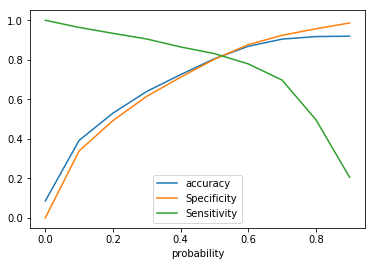

In [738]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','Specificity','Sensitivity'])

From the curve above, 0.45 is the optimum point. At this point there is a balance of sensitivity, specificity and accuracy.

In [739]:
y_predicted_final['final_predicted'] = y_predicted_final.Churn_Prob.map( lambda x: 1 if x > 0.51 else 0)

### Base Model

In [740]:
# check accuracy
Metrics_out(y_predicted_final.churn, y_predicted_final.final_predicted)

Confusion Matrix: 
 [[6679 1552]
 [ 131  639]]
Sensitivity:  0.8298701298701299
Specificity:  0.8114445389381606
AUC Score:  0.8206573344041452
Precision:  0.2916476494751255
f1 Score:  0.4316109422492401


Creating models to maximize the sensitivity and f1 score.

### AdaBoost Model (Adaptive Boosting)

Let's begin by boosting models because they are known to perform better for unbalanced class issues

In [741]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [742]:
churn_ada = DecisionTreeClassifier(max_depth=2, random_state = 100)

In [743]:
# Finding Optimum number of estimators
estimators_list = list(range(40, 150, 10))

auc_scores = []
for num_est in estimators_list:
    ABC = AdaBoostClassifier(
    base_estimator=churn_ada, 
    n_estimators = num_est)
    
    ABC.fit(X_major, y_major)
    y_pred = ABC.predict(X_test)
    score = roc_auc_score(y_test, y_pred)
    auc_scores.append(score)

In [744]:
# Anlysis of auc scores
auc_scores

[0.8507202735303817,
 0.8493419713563073,
 0.8481877981088283,
 0.8446561699750862,
 0.8528924544050287,
 0.8470336248613493,
 0.8438434363595341,
 0.8385501753743766,
 0.8413109609379807,
 0.8406008643282366,
 0.8434412507672135]

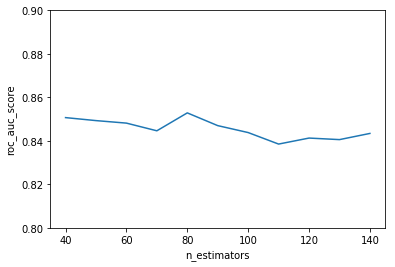

In [745]:
# plotting a graph between test scores and n_estimators
plt.plot(estimators_list, auc_scores)
plt.xlabel('n_estimators')
plt.ylabel('roc_auc_score')
plt.ylim([0.8, 0.9])
plt.show()

In [746]:
# Defining a model for the n estimators value
Estimator_model = AdaBoostClassifier(n_estimators=120,base_estimator=churn_ada)

In [747]:
# Checking the model
Estimator_model.fit(X_major,y_major)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                              

In [748]:
# test set predictions
y_pred_abc =  Estimator_model.predict(X_test)

In [749]:
Metrics_out(y_test,y_pred_abc)

Confusion Matrix: 
 [[7019 1212]
 [ 132  638]]
Sensitivity:  0.8285714285714286
Specificity:  0.8527517920058316
AUC Score:  0.8406616102886302
Precision:  0.34486486486486484
f1 Score:  0.48702290076335875


#### Gradient Boosting Model

In [750]:
from sklearn.ensemble import GradientBoostingClassifier

In [751]:
# creation of parameter grid for defining learning rate and subsample
parameter_grid = {"learning_rate": [0.1,0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [752]:
# Creating the tree as base estimator
Gradient_Boost_Clfr = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [753]:
# running a grid search
folds = 3
grid_search_GBC = GridSearchCV(Gradient_Boost_Clfr, 
                               cv = folds,
                               param_grid = parameter_grid, 
                               scoring = 'f1', 
                               return_train_score=True,                         
                               verbose = 1,n_jobs=3)

grid_search_GBC.fit(X_major, y_major)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:   14.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=2,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=200,
                                                  n_iter_no_change=None,
                                                  presort=

In [754]:
# Optimum parameters from the above
grid_search_GBC.best_params_

{'learning_rate': 0.1, 'subsample': 0.9}

In [755]:
# running gradient boosting with optimum parameters
Gradient_Boost_Clfr = GradientBoostingClassifier(learning_rate=0.1,subsample=0.3)

# fit and predict
Gradient_Boost_Clfr.fit(X_major,y_major)
y_pred_abc =  Gradient_Boost_Clfr.predict(X_test)
Metrics_out(y_test,y_pred_abc)

Confusion Matrix: 
 [[7285  946]
 [ 115  655]]
Sensitivity:  0.8506493506493507
Specificity:  0.8850686429352448
AUC Score:  0.8678589967922977
Precision:  0.4091193004372267
f1 Score:  0.5525094896668072


### Extreme Gradient Boosting Model

In [756]:
# import xgboost libraries
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [757]:
#Default xgboost model
XGBoost = XGBClassifier()

XGBoost.fit(X_major,y_major)
y_pred_xgb =  XGBoost.predict(X_test)
Metrics_out(y_test,y_pred_abc)

Confusion Matrix: 
 [[7285  946]
 [ 115  655]]
Sensitivity:  0.8506493506493507
Specificity:  0.8850686429352448
AUC Score:  0.8678589967922977
Precision:  0.4091193004372267
f1 Score:  0.5525094896668072


Obtained Metrics are similar to GBC model, Now let's check if we can tune the model

##### Hyperparameter Tuning

In [758]:

# creating a KFold cross validation 
folds = 3

# specify range of hyperparameters
param_grid = {'scale_pos_weight': [1.8,1.81,1.82,1.83,1.84,1.85,1.86,1.87,1.88,1.89]}

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = parameter_grid, 
                        scoring= 'f1', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs=3)

In [759]:
# fitting the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:  2.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=3,
             param_grid={'learning_rate': [0.1, 0.2, 0.6, 0.9],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, 

In [760]:
# checking for the best parameters
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.6}

In [761]:
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.1,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':1,
         'objective':'binary:logistic',
          'scale_pos_weight': 1.87}

# fit model on training data
XGBoost = XGBClassifier(params = params)
XGBoost.fit(X_major,y_major)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'scale_pos_weight': 1.87,
                      'subsample': 1},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [762]:
# prediction
y_xgb =  XGBoost.predict(X_test)
Metrics_out(y_test,y_xgb)

Confusion Matrix: 
 [[7335  896]
 [ 115  655]]
Sensitivity:  0.8506493506493507
Specificity:  0.8911432389746082
AUC Score:  0.8708962948119794
Precision:  0.4223081882656351
f1 Score:  0.5644118914261094


 By trading off slightly on f1 score, a possibility to increase the sensitivity. We can increase scale_pos_weight to 1.9

In [763]:
XGBoost = XGBClassifier(scale_pos_weight = 2.05)

XGBoost.fit(X_major,y_major)
y_pred_xgb =  XGBoost.predict(X_test)
Metrics_out(y_test,y_pred_xgb)

Confusion Matrix: 
 [[6800 1431]
 [  77  693]]
Sensitivity:  0.9
Specificity:  0.82614506135342
AUC Score:  0.86307253067671
Precision:  0.326271186440678
f1 Score:  0.4789219073946095


#### Ensemble modeling

Ensemble modeling is the method of running two or more associated but distinct analytical models and then synthesizing the results into one score or distributed to enhance predictive analytics and information mining applications precision

In [764]:
# importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve, GridSearchCV

Find optimal decision trees hyperparameters

In [765]:
# set hyper parameters
grid_search_best_params_ = {'max_depth': 13,
                            'max_features': 25,
                            'min_samples_leaf': 95,
                            'min_samples_split': 20,
                            'random_state': 10}

# Build Decision tree using parameters obtained.
dtree=DecisionTreeClassifier(**grid_search_best_params_)
dtree.fit(X_major, y_major)
Metrics_out(y_test, dtree.predict(X_test))

Confusion Matrix: 
 [[6818 1413]
 [ 155  615]]
Sensitivity:  0.7987012987012987
Specificity:  0.8283319159275908
AUC Score:  0.8135166073144448
Precision:  0.3032544378698225
f1 Score:  0.43959971408148674


#### Support Vecor Machine (SVM)

In [766]:
from sklearn.svm import LinearSVC

# Build linear SVM model
SVM = LinearSVC()
SVM.fit(X_train_pca, y_major)
Metrics_out(y_test, SVM.predict(X_test_pca))

Confusion Matrix: 
 [[6266 1965]
 [ 152  618]]
Sensitivity:  0.8025974025974026
Specificity:  0.7612683756530191
AUC Score:  0.7819328891252109
Precision:  0.23925667828106853
f1 Score:  0.3686251118401432


### Random Forest

Random forest algorithm is based on a concept called bagging - bootstrap aggregating. In random forest, we build a number of decision trees on bootstrap training samples. The samples are chosen, as split candidates from all the X variables (predictors). 

Let's first fit a random forest model with default hyperparameters.

In [767]:
from sklearn.ensemble import RandomForestClassifier

# building the random forest classifier
RF = RandomForestClassifier(**grid_search_best_params_, n_estimators=20)
RF.fit(X_major, y_major)
Metrics_out(y_test, RF.predict(X_test))

Confusion Matrix: 
 [[7215 1016]
 [ 136  634]]
Sensitivity:  0.8233766233766234
Specificity:  0.876564208480136
AUC Score:  0.8499704159283796
Precision:  0.3842424242424242
f1 Score:  0.5239669421487604


#### Logistic Regression

In [768]:
# building logistic regression model
LR = LogisticRegression()
LR.fit(X_major, y_major)
Metrics_out(y_test, RF.predict(X_test))

Confusion Matrix: 
 [[7215 1016]
 [ 136  634]]
Sensitivity:  0.8233766233766234
Specificity:  0.876564208480136
AUC Score:  0.8499704159283796
Precision:  0.3842424242424242
f1 Score:  0.5239669421487604


We're finally going to construct ensemble mode below

In [769]:
Nsemble_model = list(map(lambda x: 1 if (sum(x)>=2) else 0, zip(LR.predict(X_test),
                                                          dtree.predict(X_test),            
                                                          RF.predict(X_test),                                                          
                                                          SVM.predict(X_test_pca))))
Metrics_out(y_test, Nsemble_model)

Confusion Matrix: 
 [[6666 1565]
 [ 103  667]]
Sensitivity:  0.8662337662337662
Specificity:  0.8098651439679261
AUC Score:  0.838049455100846
Precision:  0.29883512544802865
f1 Score:  0.4443704197201866


#### Understanding Customer Churn parameters

In [770]:
# importing the stats model
import statsmodels.api as sm

In [771]:
# Put feature variable to X
X = churn_data.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = churn_data['churn']

In [772]:
# extracting columns
cols = X.columns

# apply standard scalar
scaler = StandardScaler()

# produce scaled features
X_scaled = scaler.fit_transform(X)

# convert to data frame
X_scaled = pd.DataFrame(X_scaled, columns=cols)

In [773]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=100)

# create majority class undersampled data frame from training data
df_train_major= Major_class_(X_train,y_train)

# extract features and labels
X_major = df_train_major.drop('churn',axis=1)
y_major = df_train_major.churn

### Lasso Regression Feature Selection

Use a LASSO penalty to remove initial unimportant features, and also tune alpha for the process.

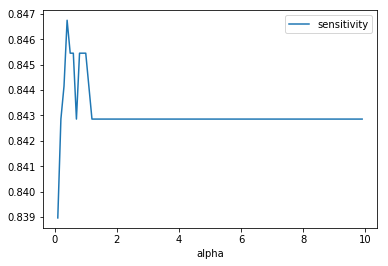

In [774]:
probable_alpha = [i/10 for i in range(1, 100)]
alpha_sensitivity = []

for alpha in probable_alpha:
    lassolr = LogisticRegression(C=alpha, penalty='l1', solver='liblinear')
    lassolr.fit(X_major, y_major)
    cp = confusion_matrix(y_test, lassolr.predict(X_test))
    alpha_sensitivity.append({"alpha": alpha, "sensitivity": cp[1,1]/(cp[1,0]+cp[1,1])})

pd.DataFrame(alpha_sensitivity).plot.line(x='alpha', y='sensitivity')

We can see from above that the sensitivity for alpha = 3 is maximized. Let's run LASSO penalty model and drop all zero-coefficient characteristics.

In [775]:
# running with alpha=0.4 and penalty = 'l1'
lassolr = LogisticRegression(C=4, penalty='l1', solver='liblinear')
lassolr.fit(X_major, y_major)
LR_coefs = dict(zip(X_major.columns, lassolr.coef_[0]))
{k:v for k,v in LR_coefs.items() if v == 0}

{'onnet_mou_7': 0.0, 'onnet_mou_8': 0.0, 'max_rech_data_good_phase': 0.0}

Now we're going to generate our model, let's create a feature to train model and print model metrics, VIF values with the additional unit to drop columns passed in the function parameter 'drop_column'.

In [776]:
# creating a function to test model, print metrics, VIF score and drop columns
def testing_of_model(x_train, x_test, y_train, y_test, drop_column = None):
    drop_column = drop_column or []
    x_train = x_train.drop(drop_column, axis=1)
    x_test = x_test.drop(drop_column, axis=1)
    lr = LogisticRegression(C=4.0, penalty='l1', solver='liblinear')
    lr.fit(x_train, y_train)
    print("Scoring on TEST {}, TRAIN {}".format(lr.score(x_test,y_test), lr.score(x_train,y_train)))
    Metrics_out(y_test,lr.predict(x_test))
    x_train = sm.add_constant(x_train)
    stat_model = sm.Logit(y_train, x_train).fit_regularized(method='l1')
    print(stat_model.summary())
    # calculating VIF
    vif_dataframe = pd.DataFrame( columns = ['Var', 'Vif'])
    for i, var in enumerate(x_train.columns):
        ## performing Linear Regression for finding the variance of the features(multicollinear)
        pqr = sm.OLS(x_train[var], x_train.drop([var], axis=1)).fit().rsquared
        vif = round( 1 / (1 - pqr + 0.00000000001), 2)
        vif_dataframe.loc[i] = [var, vif]
    return vif_dataframe.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [777]:
# testing model on majority undersampled data
testing_of_model(X_major, X_test, y_major, y_test)

Scoring on TEST 0.8185757138095767, TRAIN 0.8356164383561644
Confusion Matrix: 
 [[6719 1512]
 [ 121  649]]
Sensitivity:  0.8428571428571429
Specificity:  0.8163042157696513
AUC Score:  0.8295806793133971
Precision:  0.3003239241092087
f1 Score:  0.44285226885022183
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.411765348492636
            Iterations: 401
            Function evaluations: 402
            Gradient evaluations: 401
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3504
Model:                          Logit   Df Residuals:                     3426
Method:                           MLE   Df Model:                           77
Date:                Sat, 17 Aug 2019   Pseudo R-squ.:                  0.4059
Time:                        22:32:31   Log-Likelihood:                -1442.8
converged:                       True   LL-Nul

,Var,Vif
75,offnet_mou_good_phase,6956.18
59,std_og_t2m_mou_good_phase,5568.17
60,std_og_t2t_mou_good_phase,5295.78
4,onnet_mou_8,3064.91
5,offnet_mou_8,3039.19
12,std_og_t2t_mou_8,2398.25
13,std_og_t2m_mou_8,2000.60
2,onnet_mou_6,1804.94
3,onnet_mou_7,1680.28
62,loc_og_t2m_mou_good_phase,1450.72


#### Dropping variables (high VIF and p-value)
We run the test model function iteratively to reach the list of features to be dropped below with high p-value and high VIF:

In [778]:
drop_column=["onnet_mou_8", "std_og_t2m_mou_8", "offnet_mou_good_phase", "loc_og_t2m_mou_good_phase",
      "og_others_8", "total_rech_amt_good_phase", "total_rech_amt_8", "arpu_8", "vol_3g_mb_8", "loc_og_t2f_mou_good_phase", 
       "isd_og_mou_8",
      "spl_og_mou_good_phase", "std_og_t2f_mou_good_phase", "total_rech_amt_data_good_phase", "max_rech_data_good_phase",
      "loc_og_t2f_mou_8", "vbc_3g_good_phase", "isd_og_mou_good_phase",
      "total_rech_amt_data_8", "max_rech_amt_good_phase", "total_rech_num_good_phase",
      "sachet_2g_good_phase", "ic_others_8", "std_ic_t2f_mou_8", "og_others_good_phase",
      "ic_others_good_phase", "roam_ic_mou_8", "monthly_3g_good_phase", "loc_ic_t2m_mou_8",
      "isd_ic_mou_8", "loc_og_t2c_mou_good_phase", "last_day_rch_amt_good_phase",
      "std_og_t2f_mou_8", "sachet_3g_good_phase", "sachet_3g_8", "std_og_t2t_mou_good_phase",
      "loc_og_t2c_mou_8", "spl_og_mou_8", "vbc_3g_8",
      "vol_3g_mb_good_phase", "roam_og_mou_good_phase", "monthly_2g_8", "monthly_3g_8",
      "loc_og_t2t_mou_good_phase", "loc_og_t2t_mou_8", "max_rech_amt_8", "spl_ic_mou_8",
      "std_ic_t2m_mou_8", "std_ic_t2t_mou_8","std_og_t2m_mou_good_phase"]
Features_list_lr = list(set(X_major.columns) - set(drop_column))

In [779]:
# run with columns to be dropped to check the final p-values and VIF
testing_of_model(X_major, X_test, y_major, y_test, drop_column=drop_column)

Scoring on TEST 0.798133540717698, TRAIN 0.8133561643835616
Confusion Matrix: 
 [[6554 1677]
 [ 140  630]]
Sensitivity:  0.8181818181818182
Specificity:  0.7962580488397522
AUC Score:  0.8072199335107852
Precision:  0.27308192457737324
f1 Score:  0.4094897627559311
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.44427394408395093
            Iterations: 82
            Function evaluations: 82
            Gradient evaluations: 82
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3504
Model:                          Logit   Df Residuals:                     3476
Method:                           MLE   Df Model:                           27
Date:                Sat, 17 Aug 2019   Pseudo R-squ.:                  0.3590
Time:                        22:33:10   Log-Likelihood:                -1556.7
converged:                       True   LL-Null:

,Var,Vif
2,onnet_mou_7,3.35
1,onnet_mou_6,2.50
26,loc_incoming_t2t_mou_good_phase,2.48
7,loc_ic_t2t_mou_8,2.42
8,loc_ic_t2f_mou_8,2.30
27,loc_incoming_t2f_mou_good_phase,2.28
6,std_og_t2t_mou_8,2.06
3,offnet_mou_8,1.81
5,loc_og_t2m_mou_8,1.80
9,total_rech_num_8,1.66


#### Visualizations of variables

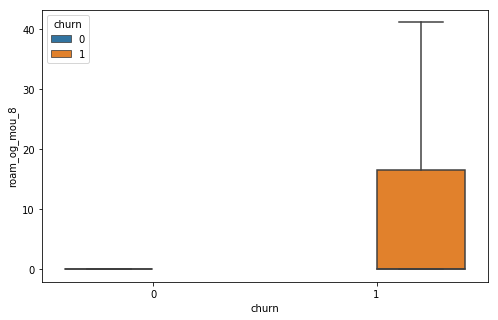

In [780]:
# Positive coefficient variables-Higher the churning value
plt.rcParams["figure.figsize"] = [8, 5]
fig = plt.figure()
# High variance in Roam Outgoing Minutes of Usage, = > elevated churn likelihood
sns.boxplot(data=churn_data, y="roam_og_mou_8", x="churn", hue="churn", linewidth=1.5, showfliers=False)

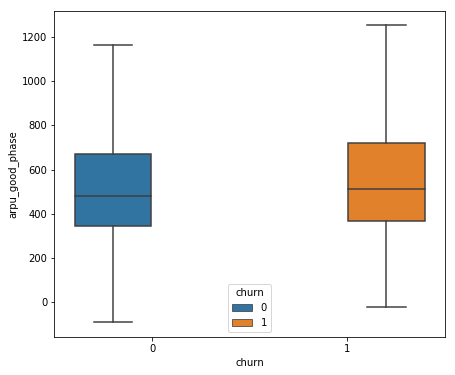

In [781]:
#High variance in 8th month ARPU, = > Customers use some expensive feature = > elevated churn likelihood
plt.rcParams["figure.figsize"] = [7, 6]
fig = plt.figure()
sns.boxplot(data=churn_data, y="arpu_good_phase", x="churn", hue="churn", linewidth=1.5, showfliers=False)

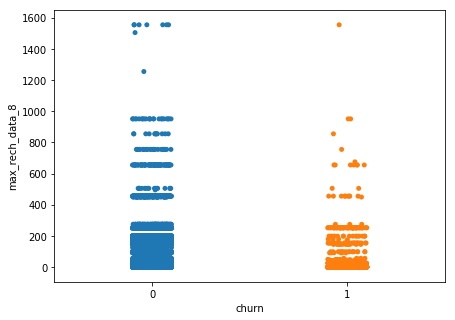

In [782]:
plt.rcParams["figure.figsize"] = [7, 5]
sns.stripplot(x="churn", y="max_rech_data_8", data=churn_data, jitter=True)

Our model demonstrates that good phase and action phase parameters affect customer churn relatively. If some good phase indicator is in high range and we see a decrease in some other parameter value of the action phase it shows a powerful churn possibility.

Some good phase indicators:

* arpu_good_phase: average revenue per user: If the customer's average income is high in good phase, the default liklihood is lower.
* vol_2g_mb_good_phase: volume of 2G data usage: If the volume of 2 G data use in good phase is high, then there is less probability of default.
* aon: age on network: As the age on network rises for the customer, the chances of churn is reduced.

Action phase indicators for customer churn:

* loc_ic_t2t_mou_8: local incoming calls within same telecom network: If the incoming local calls for t2t fall in action phase then there are high chances of default.

* loc_og_t2m_mou_8: local outgoing calls from telecom operator to other network mobile:Again shows a high customer churn possibility.

* vol_2g_mb_8/sachet_2g_8: volumne of 2G usage and sachet topup for 2G data: Churn is also highly indicative of a drop in 2 G use quantity of sachet top-ups.

* max_rech_data_8: maximum data recharge: If the maximum data recharge done by customer falls in action phase then it shows a tendency to default.

* loc_ic_t2f_mou_8: local incoming calls from fixed line: a drop in calls from fixed line to customer is also highly suggestive of churn.

* day_of_last_rech_shift: shift in day of last recharge as compared to previous month: The behavior is also extremely indicative of churn if the last recharge is not in the last week of the month.

* roam_og_mou_8: roaming outgoing calls: If there is rise in outgoing roaming calls then it can trigger the operator's customer churn, this could be because customers incur elevated roaming charges and would therefore like to move to a local number.

In addition to the above model-based features, we also noticed in EDA that the percentage of churn is higher for 2 G use compared to 3 G use, suggesting that some users may migrate to other operators due to better 3 G network accessibility.

In [783]:
# vol 2g/3g usage
volume_3g_2g = churn_data.columns[churn_data.columns.str.contains('vol_2g_mb|vol_3g_mb',regex=True)]

# checking mean variation in total recharge numbers for churned and not churned customers
pd.DataFrame([churn_data.loc[churn_data.churn==0,volume_3g_2g].mean()
              ,churn_data.loc[churn_data.churn==1,volume_3g_2g].mean()],index={'Not Churned','Churned'})

,vol_2g_mb_8,vol_3g_mb_8,vol_2g_mb_good_phase,vol_3g_mb_good_phase
Not Churned,113.56,375.78,128.27,367.26
Churned,22.56,86.92,99.01,247.96


### Summary and Recommendations

Suggestions for reducing customer churn based on modeling and EDA:
* We can infer from the above that incoming and outgoing calls within a circle are essential to recognizing churn customers.
* Lower tariffs on data usage-provide better 2G area coverage, where 3G is not available.
* The Network operators should investigate their roaming tariffs, and quality of service.
* Expand the 3G network to access the area where 3G is currently not available.
* Churners show higher roaming usage than non-churners- So Lower the roaming charges.
* The other key factor is if the recharge amount shows a dip in the action phase then that is a sign of churn.
* Provide Customized pre-paid plan offers by continuous monitoring of behavioural signs of customers.
* Provide Privilege Customer offers for the customer who are staying longer with network to increase customer loyalty to the telecom operator.
* Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn
* Max Recharge Amount could be a good Churn Indicator
* Local Incoming and Outgoing Calls for 8th Month and Average Revenue in 8th Month are strong indicators of Churn Behaviour
